<a href="https://colab.research.google.com/github/EasonJia9598/Dataset_of_Australia_wildfire/blob/main/Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Zesheng Jia</b>  
\<B00845993\> 



# Table of Contents<a class="anchor" id="top"></a>

* # [TODO list]
    * ### [todo 1](#todo_1)
* # [Initialization](#initialization)
    * ### [Import packages](#packages)
    * ### [Jupyter notebook setting](#book_setting)
* # [1. Task 1: Data Exploration and preprocessing](#task1_top)
    * ### [Self-defined functions/Class in task 1](#func_task1)
    * ## [1. Data quality report](#task1_1)
        * ### [a. Load Data and generate data quality report](#task1_a)
            * #### [a.1. Data Loading](#task1_a_1)
            * #### [a.2. Data set report](#task1_a_2)
            * #### [a.3. Data quality report](#task1_a_3)
                * ##### [a.3.1 Continuous features report](#task1_a_3_1)
                * ##### [a.3.2 Categorical features report](#task1_a_3_2)
                * ##### [a.3.3 Columns value counts report](#task1_a_3_3)
            * #### [a.4 Feature visualization](#task1_a_4)
                * ##### [a.4.0. Define a function to plot Multiple kinds of visualization](#task1_a_4_0)
                * ##### [a.4.1. Continuous features](#task1_a_4_1)
                    * ##### [a.4.1.a. Histogram of all cont. features](#task1_a_4_1_a)
                    * ##### [a.4.1.b. Boxplot of all cont. features](#task1_a_4_1_b)
                * ##### [a.4.2. Categorical features](#task1_a_4_2)            
        * ### [b. Plot the heatmap correlation among the variables in the data](#task1_b)
            * #### [Plot a heatmap](#task1_b_1)
        * ### [c. Identify data quality issues and build the data quality plan](#task1_c)  
            * #### [c.0. Part c Utility functions](#task1_c_0)
            * #### [c.1. Data quality issues table](#task1_c_1)
                * ###### [c.1.1 Identify the problem](#task1_c_1.1)
                * ###### [c.1.1.1 FRP target value investigation](#task1_c_1.1.1)
                * ###### [c.1.1.2. FTP data quality plan](#task1_c_1.1.2)  
            * ##### [c.1.2 Data quality plan](#task1_c_1.2)  
            
    * ## [2. Preprocess your data according to the data quality plan](#task1_2)
     
     
     
     
 [back to top](#top)
             

## Initialization <a class="anchor" id="initialization" name="initialization"></a>

#### Download dataset

In [ ]:
!wget https://github.com/EasonJia9598/Dataset_of_Australia_wildfire/raw/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2017_Australia.csv
!wget https://github.com/EasonJia9598/Dataset_of_Australia_wildfire/raw/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2018_Australia.csv
!wget https://github.com/EasonJia9598/Dataset_of_Australia_wildfire/raw/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2019_Australia.csv
!wget https://github.com/EasonJia9598/Dataset_of_Australia_wildfire/raw/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2020_Australia.csv

--2022-05-25 19:40:48--  https://github.com/EasonJia9598/Dataset_of_Australia_wildfire/raw/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2017_Australia.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EasonJia9598/Dataset_of_Australia_wildfire/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2017_Australia.csv [following]
--2022-05-25 19:40:48--  https://raw.githubusercontent.com/EasonJia9598/Dataset_of_Australia_wildfire/2e9f30f3e5720b2601b08ebabda6a2856ea09d3e/modis_2017_Australia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21760820 (21M) [text/plain]
Saving to: ‘modis_2017_Australia

### Import some packages<a class="anchor" name="packages"></a>
> Hidden Cell: You may unfold this section for code details

In [ ]:




# import all related libraries
import pandas as pd
import warnings
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import joblib
import datetime
import math
from sklearn.base import BaseEstimator, TransformerMixin

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

myseed = 42069  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

### Jupyer notebook setting<a class="anchor" name="book_setting"></a>
> Hidden Cell: You may unfold this section for code details

In [ ]:
sns.set()
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

###############################################
def max_print_out(pattern=False):
    '''It will maximize print out line and set float format with .2f'''
    number = None if pattern else 10
    # Set options to avoid truncation when displaying a dataframe
    pd.set_option("display.max_rows", number)
    pd.set_option("display.max_columns", 20)
    # Set floating point numbers to be displayed with 2 decimal places
    pd.set_option('display.float_format', '{:.2f}'.format)
    # for showing all entities 
    


# 1. Task 1: Data Exploration and preprocessing (0.1) <a class="anchor" name="task1_top"></a>


1. Data quality report.

    a. Generate data quality reports for the continuous and the categorical features of the data set

    b. Plot the heatmap correlation among the variables in the data

    c. Identify data quality issues and build the data quality plan

### Some useful functions and classes I generated and used in Task 1 <a class="anchor" name="func_task1"></a>
> Hidden Cell: You may unfold this section for code details

In [ ]:
################################  FUNCTION  ################################

    
#---------------------------Load Data---------------------------------------

def loading_data(path):
    '''This function will load mutiple data set and combine them together'''
    if len(path) > 1:
        data = pd.read_csv(path[0])
        for i in range(len(path)-1):
            data = pd.concat([data,pd.read_csv(path[i+1])] , axis=0) 
        # reset index for resolving duplicate indexing probelem
        data = data.reset_index(drop=False)
        # there is a column called index. We won't use it
        # Becasue we will set up our own index
        data = data.drop(['index'],axis=1)
        print("Successfully combined ",len(path), " dataset")
        return data
    else:
        data = data.drop(['index'],axis=1)
        print("Successfully load ",len(path), " dataset")
        return pd.read_csv(path[0])
    
#--------------------------Describe columns----------------------------------------

def describe_columns(data, features_name=[]):
    '''This function will help u print out features value counts'''
    if len(features_name) > 1:
        for i in range(len(features_name)):
            print("----------", data[features_name[i]].name,"---------")
            print(data[features_name[i]].value_counts())
    else:
        print("----------", data[features_name[0]].name,"---------")
        print(data[features_name[0]].value_counts())
        

#-------------Function from tutorial 2-----------------------------

def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df
    
#-------------Function from tutorial 2---------------------------

def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


#-------------One function to plot multiple kinds of graph ---------------------------

# set keyword only parameter. Since our data set is too big. must be indentified before ploting

def mulitple_function_plots(tight_layout = True, h_space = 0.4,w_space=0.3, fig_size = (10,15) , 
                            *,data,plot_type="histogram",data_type="number"):
    
    '''Plot all features from the dataset, you must specified your dataset by, data = '''
    if data_type == "number":
        feat_names = data.select_dtypes("number").columns 
    elif data_type == "categorical":
        feat_names = data.select_dtypes(exclude="number").columns
        
    # seperate those features into 2 columns
    rows_number = math.ceil(len(feat_names)/2.0)
    
    print("Those features will be plotted in ", rows_number, " rows and 2 columns")
    # print continuous features name
    print(feat_names)
    
    #initialize figure
    fig, axs = plt.subplots(rows_number, 2, figsize=fig_size)
    index = 0
    start = datetime.datetime.now()
    
    #print
    for i in range(rows_number):
        for j in range(2):
            if index < len(feat_names):
                if plot_type == 'histogram':
                    sns.histplot(data=data, x=feat_names[index], bins = 30,kde=True, ax=axs[i][j])
                elif plot_type == 'boxplot':
                    data.boxplot(column=feat_names[index],ax=axs[i][j], vert=False)
                elif plot_type == 'barplot':
                    data[feat_names[index]].value_counts().plot.bar(ax=axs[i][j]);
                axs[i][j].set_xlabel(feat_names[index])
                end = datetime.datetime.now()
                print(index+1, ". Finish Rendering :", feat_names[index],", used",  
                      (end - start).microseconds/1000, "millseconds")
                index += 1
            else:
                break
    #adjust pictures
    plt.subplots_adjust(hspace = h_space,wspace=w_space)
    fig.suptitle(str(plot_type.title() + " of all " + data_type.title() + " features"), fontweight ="bold")
    if tight_layout:
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
    return axs

#------------- draw heatmap -----------------------------------------------------

def heatmap_draw(data):
    # Correlation between different variables
    corr = data.corr()
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(12, 10))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(corr, annot=True, cmap=cmap)
    plt.title("Heatmap correlation among all features")
    
    

################################  CLASS  ################################

# Class for data transformer
# import important libray
from sklearn.base import BaseEstimator, TransformerMixin

class data_cleaner(BaseEstimator, TransformerMixin):
    '''data clean transfomer class'''
    
    def __init__(self, data_clean = True): # no *args or **kargs
        self.data_clean = data_clean
        
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Start to change all string columns that related to Dates to Time Series
        minutes = X['acq_time'] % 100
        hours = (X['acq_time'] /100).astype(int) 
        #concatenate 
        X['acq_date'] =  X['acq_date'] + '-'  + hours.apply(str) + "-" + minutes.apply(str)
        X['acq_date'] = pd.to_datetime(X['acq_date'], format= '%Y-%m-%d-%H-%M')
        X = X.set_index('acq_date')
        
        if self.data_clean:
            # Transter categorical data to numerical value
            # Start to apply one hot encoding
            statelitte = pd.get_dummies(X.satellite)
            daynight = pd.get_dummies(X.daynight)
            X = pd.concat([X,statelitte,daynight], axis=1)
            X = X.drop(['acq_time', 'instrument','version','satellite','daynight'],axis=1) 
            return X
        else:
            X = X.drop(['acq_time', 'instrument','version'],axis=1) 
            return X
        
#############################################################################   

    


# 1. Data quality report <a class="anchor" name="task1_1"></a>

## a. Loading Data and generate data quality report <a class="anchor" name="task1_a"></a>
            


### a.1. Data loading<a class="anchor" name="task1_a_1"></a>
> Load all four  Data sets and combine them together

In [ ]:
# Load Data
# loading_data is a function I put in above code section
raw_data  = loading_data(["./modis_2017_Australia.csv" , 
                          "./modis_2018_Australia.csv","./modis_2019_Australia.csv",
                          "./modis_2020_Australia.csv"])
# data_clean_generator = data_cleaner(data_clean=True)
# clean_data = data_clean_generator.transform(raw_data)

Successfully combined  4  dataset


### a.2. Data set report<a class="anchor" name="task1_a_2"></a>            

> In this section. Mainly focus on take a glance of our data set

In [ ]:
# I turn off the maximun rows display for showing the last comlumn in the data set
# It will helpe me to see whether I concatenate those files correctly in general.
max_print_out(False)
raw_data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-23.91,147.30,320.10,1.70,1.30,2017-01-01,47,Terra,MODIS,53,6.20,296.60,17.60,D,0
1,-23.69,150.10,314.30,2.70,1.60,2017-01-01,47,Terra,MODIS,22,6.20,289.30,30.00,D,0
2,-23.59,150.17,315.80,2.70,1.60,2017-01-01,47,Terra,MODIS,33,6.20,291.70,35.40,D,0
3,-22.41,148.85,316.70,2.10,1.40,2017-01-01,47,Terra,MODIS,26,6.20,295.30,25.80,D,0
4,-20.59,147.64,320.70,1.60,1.30,2017-01-01,47,Terra,MODIS,34,6.20,299.60,19.00,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046674,-28.29,122.27,309.90,2.20,1.50,2020-12-31,1409,Terra,MODIS,31,6.03,289.10,32.80,N,0
1046675,-30.86,121.50,308.00,1.20,1.10,2020-12-31,1721,Aqua,MODIS,73,6.03,292.40,10.30,N,2
1046676,-28.29,122.27,319.30,1.20,1.10,2020-12-31,1721,Aqua,MODIS,65,6.03,292.70,20.60,N,0
1046677,-28.28,122.26,345.20,1.20,1.10,2020-12-31,1721,Aqua,MODIS,100,6.03,297.00,69.00,N,0


--------- 
We can see that we combine all four files successfully.

The acq_date is between 2017-01-01 to 2020-12-31. All four files' are in it.

In [ ]:
# We set our print out line limis to maximum and set string out print format [.2f ]
max_print_out(True)
# describe continous features summary
raw_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00,1046679.00
mean,-21.96,135.25,332.88,1.66,1.23,622.02,71.06,6.07,303.23,70.50,0.01
std,7.79,10.52,23.11,0.85,0.26,532.04,22.92,0.07,10.73,169.47,0.17
min,-43.50,113.13,300.00,1.00,1.00,0.00,0.00,6.03,265.70,-29.90,0.00
25%,-28.77,126.80,317.90,1.10,1.00,225.00,56.00,6.03,295.90,14.60,0.00
50%,-19.92,133.14,328.70,1.30,1.10,444.00,74.00,6.03,303.00,28.60,0.00
75%,-15.30,144.96,341.60,1.90,1.40,629.00,90.00,6.20,309.80,63.50,0.00
max,-9.25,153.59,507.00,4.80,2.00,2359.00,100.00,6.20,400.10,11164.10,3.00


In [ ]:
# get rid of Object type
raw_data = raw_data.convert_dtypes()
# showing the index dtype and columns, non-null values and memory usage.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046679 entries, 0 to 1046678
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1046679 non-null  Float64
 1   longitude   1046679 non-null  Float64
 2   brightness  1046679 non-null  Float64
 3   scan        1046679 non-null  Float64
 4   track       1046679 non-null  Float64
 5   acq_date    1046679 non-null  string 
 6   acq_time    1046679 non-null  Int64  
 7   satellite   1046679 non-null  string 
 8   instrument  1046679 non-null  string 
 9   confidence  1046679 non-null  Int64  
 10  version     1046679 non-null  Float64
 11  bright_t31  1046679 non-null  Float64
 12  frp         1046679 non-null  Float64
 13  daynight    1046679 non-null  string 
 14  type        1046679 non-null  Int64  
dtypes: Float64(8), Int64(3), string(4)
memory usage: 130.8 MB


In [ ]:
len(raw_data) - len(raw_data[(raw_data['frp'] < 200)])

69704

---------
Luckily we don't have any missing value.

Their features' types are 4 String, 3 integer and the rest are Float64 type.

We would like to find out their details and how to deal with them.

### a.3. Data quality report<a class="anchor" name="task1_a_3"></a>
In this section we will focus on find out:
* **Tabular report for continuous features**
* **Tabular report for categorical features**
* **Data visualizations of values in each feature** (source: Tutorial 2)


#### 1. Continuous features report<a class="anchor" name="task1_a_3_1"></a>

In [ ]:
max_print_out(True)
# Call function from 
build_continuous_features_report(raw_data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
latitude,1046679,0.00,259382,-43.50,-28.77,-21.96,-19.92,-15.30,-9.25,7.79
longitude,1046679,0.00,325532,113.13,126.80,135.25,133.14,144.96,153.59,10.52
brightness,1046679,0.00,2050,300.00,317.90,332.88,328.70,341.60,507.00,23.11
scan,1046679,0.00,39,1.00,1.10,1.66,1.30,1.90,4.80,0.85
track,1046679,0.00,11,1.00,1.00,1.23,1.10,1.40,2.00,0.26
acq_time,1046679,0.00,855,0.00,225.00,622.02,444.00,629.00,2359.00,532.04
confidence,1046679,0.00,101,0.00,56.00,71.06,74.00,90.00,100.00,22.92
version,1046679,0.00,2,6.03,6.03,6.07,6.03,6.20,6.20,0.07
bright_t31,1046679,0.00,972,265.70,295.90,303.23,303.00,309.80,400.10,10.73
frp,1046679,0.00,13993,-29.90,14.60,70.50,28.60,63.50,11164.10,169.47


In categorical features report, there are 4 features have too low cardinality.

They are "scan", "track", "version", "type". Especially, version and type only have cad < 3.


#### 2. Categorical features report<a class="anchor" name="task1_a_3_2"></a>

In [ ]:
build_categorical_features_report(raw_data)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
acq_date,1046679,0.00,1461,2020-01-04,7351,0.70,[2019-12-30],6925,0.66
satellite,1046679,0.00,2,Aqua,600236,57.35,[Terra],446443,42.65
instrument,1046679,0.00,1,MODIS,1046679,100.00,[],0,0.00
daynight,1046679,0.00,2,D,806375,77.04,[N],240304,22.96



In categorical features report, there is one feature has too high cardinality. "acq_data"

Here I would like to print out their value_counts(), to find out what their values are.

#### 3. Columns value counts report<a class="anchor" name="task1_a_3_3"></a>

In [ ]:
# display value counts report of continuous features
describe_columns(raw_data, ['version','type','scan','track'])

---------- version ---------
6.03    773367
6.20    273312
Name: version, dtype: Int64
---------- type ---------
0    1039215
2       7075
3        389
Name: type, dtype: Int64
---------- scan ---------
1.00    239204
1.10    155850
1.20     91576
1.30     70008
1.40     56280
1.50     44653
1.60     40234
1.70     31939
1.80     30614
1.90     26243
2.00     22713
2.10     20882
2.30     17855
2.20     17809
2.50     14841
2.40     14073
2.80     11858
2.70     11602
2.60     11556
2.90     10507
3.00     10495
3.10      8584
3.20      7997
3.40      7850
3.30      6566
3.80      6486
3.60      6338
4.10      5438
3.50      5365
4.30      5171
3.70      5119
3.90      5116
4.00      4021
4.40      3998
4.50      3994
4.20      3961
4.70      3815
4.60      3731
4.80      2337
Name: scan, dtype: Int64
---------- track ---------
1.00    343564
1.10    211514
1.20    129019
1.30     93439
1.40     69005
1.50     53991
1.60     45987
1.70     35270
1.80     28424
1.90     23861
2.00     1

In [ ]:
# display value counts report of categorical features
describe_columns(raw_data, ['acq_date'])

---------- acq_date ---------
2020-01-04    7351
2019-12-30    6925
2019-12-19    4768
2020-01-02    4390
2020-01-03    4260
2019-11-08    4095
2019-12-21    4031
2019-12-18    4000
2019-12-06    3787
2019-12-20    3721
2020-01-01    3683
2019-12-05    3486
2019-12-31    3438
2019-11-12    3342
2018-10-11    3321
2017-11-28    3301
2019-12-29    3236
2019-12-04    3145
2019-11-09    3140
2017-09-23    3105
2018-10-18    2998
2017-10-31    2976
2019-12-09    2945
2019-12-16    2854
2018-05-14    2748
2019-12-07    2746
2019-12-15    2744
2018-10-12    2741
2018-10-14    2713
2019-12-17    2690
2018-05-18    2676
2017-11-05    2657
2019-11-07    2644
2017-11-02    2630
2019-11-15    2627
2019-11-10    2605
2017-09-22    2586
2017-11-03    2585
2018-11-30    2575
2018-12-01    2560
2017-09-18    2546
2017-11-04    2474
2019-01-02    2468
2018-10-16    2447
2019-11-19    2423
2018-12-02    2389
2019-12-03    2387
2019-12-28    2381
2018-10-13    2358
2018-04-28    2357
2017-05-11    2354
2

### a.4. Feature visualization<a class="anchor" name="task1_a_4"></a>
In this section, we will visualize our features with different kinds of plots.<br>
But first, let's define a multiple plot function.
Which can take dataset, plot type, feature type.
```
def mulitple_function_plots(*,data,plot_type="histogram", data_type="number"):
```

##### Define a function to plot Multiple kinds of visualization<a class="anchor" name="task1_a_4_0"></a>
> **IMPORTANT** <br> This section is only using for showing the details for TA mark grades more easily.<br>
The real function is in [Self-defined functions/Class in task 1](#func_task1)<br>
And any future maintenance of this function will not applied in here.<br>
*Please Do not run this block* <br>
Hidden block, you may unfold for details

In [ ]:
#-------------One function to plot multiple kinds of graph ---------------------------

# set keyword only parameter. Since our data set is too big. must be indentified before ploting

def mulitple_function_plots(tight_layout = True, h_space = 0.4,w_space=0.3, fig_size = (10,15) , 
                            *,data,plot_type="histogram",data_type="number"):
    
    '''Plot all features from the dataset, you must specified your dataset by, data = '''
    if data_type == "number":
        feat_names = data.select_dtypes("number").columns 
    elif data_type == "categorical":
        feat_names = data.select_dtypes(exclude="number").columns
        
    # seperate those features into 2 columns
    rows_number = math.ceil(len(feat_names)/2.0)
    
    print("Those features will be plotted in ", rows_number, " rows and 2 columns")
    # print continuous features name
    print(feat_names)
    
    #initialize figure
    fig, axs = plt.subplots(rows_number, 2, figsize=fig_size)
    index = 0
    start = datetime.datetime.now()
    
    #print
    for i in range(rows_number):
        for j in range(2):
            if index < len(feat_names):
                if plot_type == 'histogram':
                    sns.histplot(data=data, x=feat_names[index], bins = 30,kde=True, ax=axs[i][j])
                elif plot_type == 'boxplot':
                    data.boxplot(column=feat_names[index],ax=axs[i][j], vert=False)
                elif plot_type == 'barplot':
                    data[feat_names[index]].value_counts().plot.bar(ax=axs[i][j]);
                axs[i][j].set_xlabel(feat_names[index])
                end = datetime.datetime.now()
                print(index+1, ". Finish Rendering :", feat_names[index],", used",  
                      (end - start).microseconds/1000, "millseconds")
                index += 1
            else:
                break
    #adjust pictures
    plt.subplots_adjust(hspace = h_space,wspace=w_space)
    fig.suptitle(str(plot_type.title() + " of all " + data_type.title() + " features"), fontweight ="bold")
    if tight_layout:
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
    return axs


#### a.4.1. Continuous features <a class="anchor" name="task1_a_4_1"></a>

We will plot a few graphs for showing more details of our cont. features.<br>

##### a.4.1.a. Histogram of all cont. features.<a class="anchor" name="task1_a_4_1_a"></a>

We will plot all features in histogram graph with bin size = 30. <br>
After I tried a few combination of bin size. 30 is a good one to display and not too messy.

Those features will be plotted in  6  rows and 2 columns
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')
1 . Finish Rendering : latitude , used 911.789 millseconds
2 . Finish Rendering : longitude , used 576.449 millseconds
3 . Finish Rendering : brightness , used 807.222 millseconds
4 . Finish Rendering : scan , used 242.105 millseconds
5 . Finish Rendering : track , used 720.537 millseconds
6 . Finish Rendering : acq_time , used 964.114 millseconds
7 . Finish Rendering : confidence , used 790.365 millseconds
8 . Finish Rendering : version , used 949.751 millseconds
9 . Finish Rendering : bright_t31 , used 231.519 millseconds
10 . Finish Rendering : frp , used 793.729 millseconds
11 . Finish Rendering : type , used 360.11 millseconds


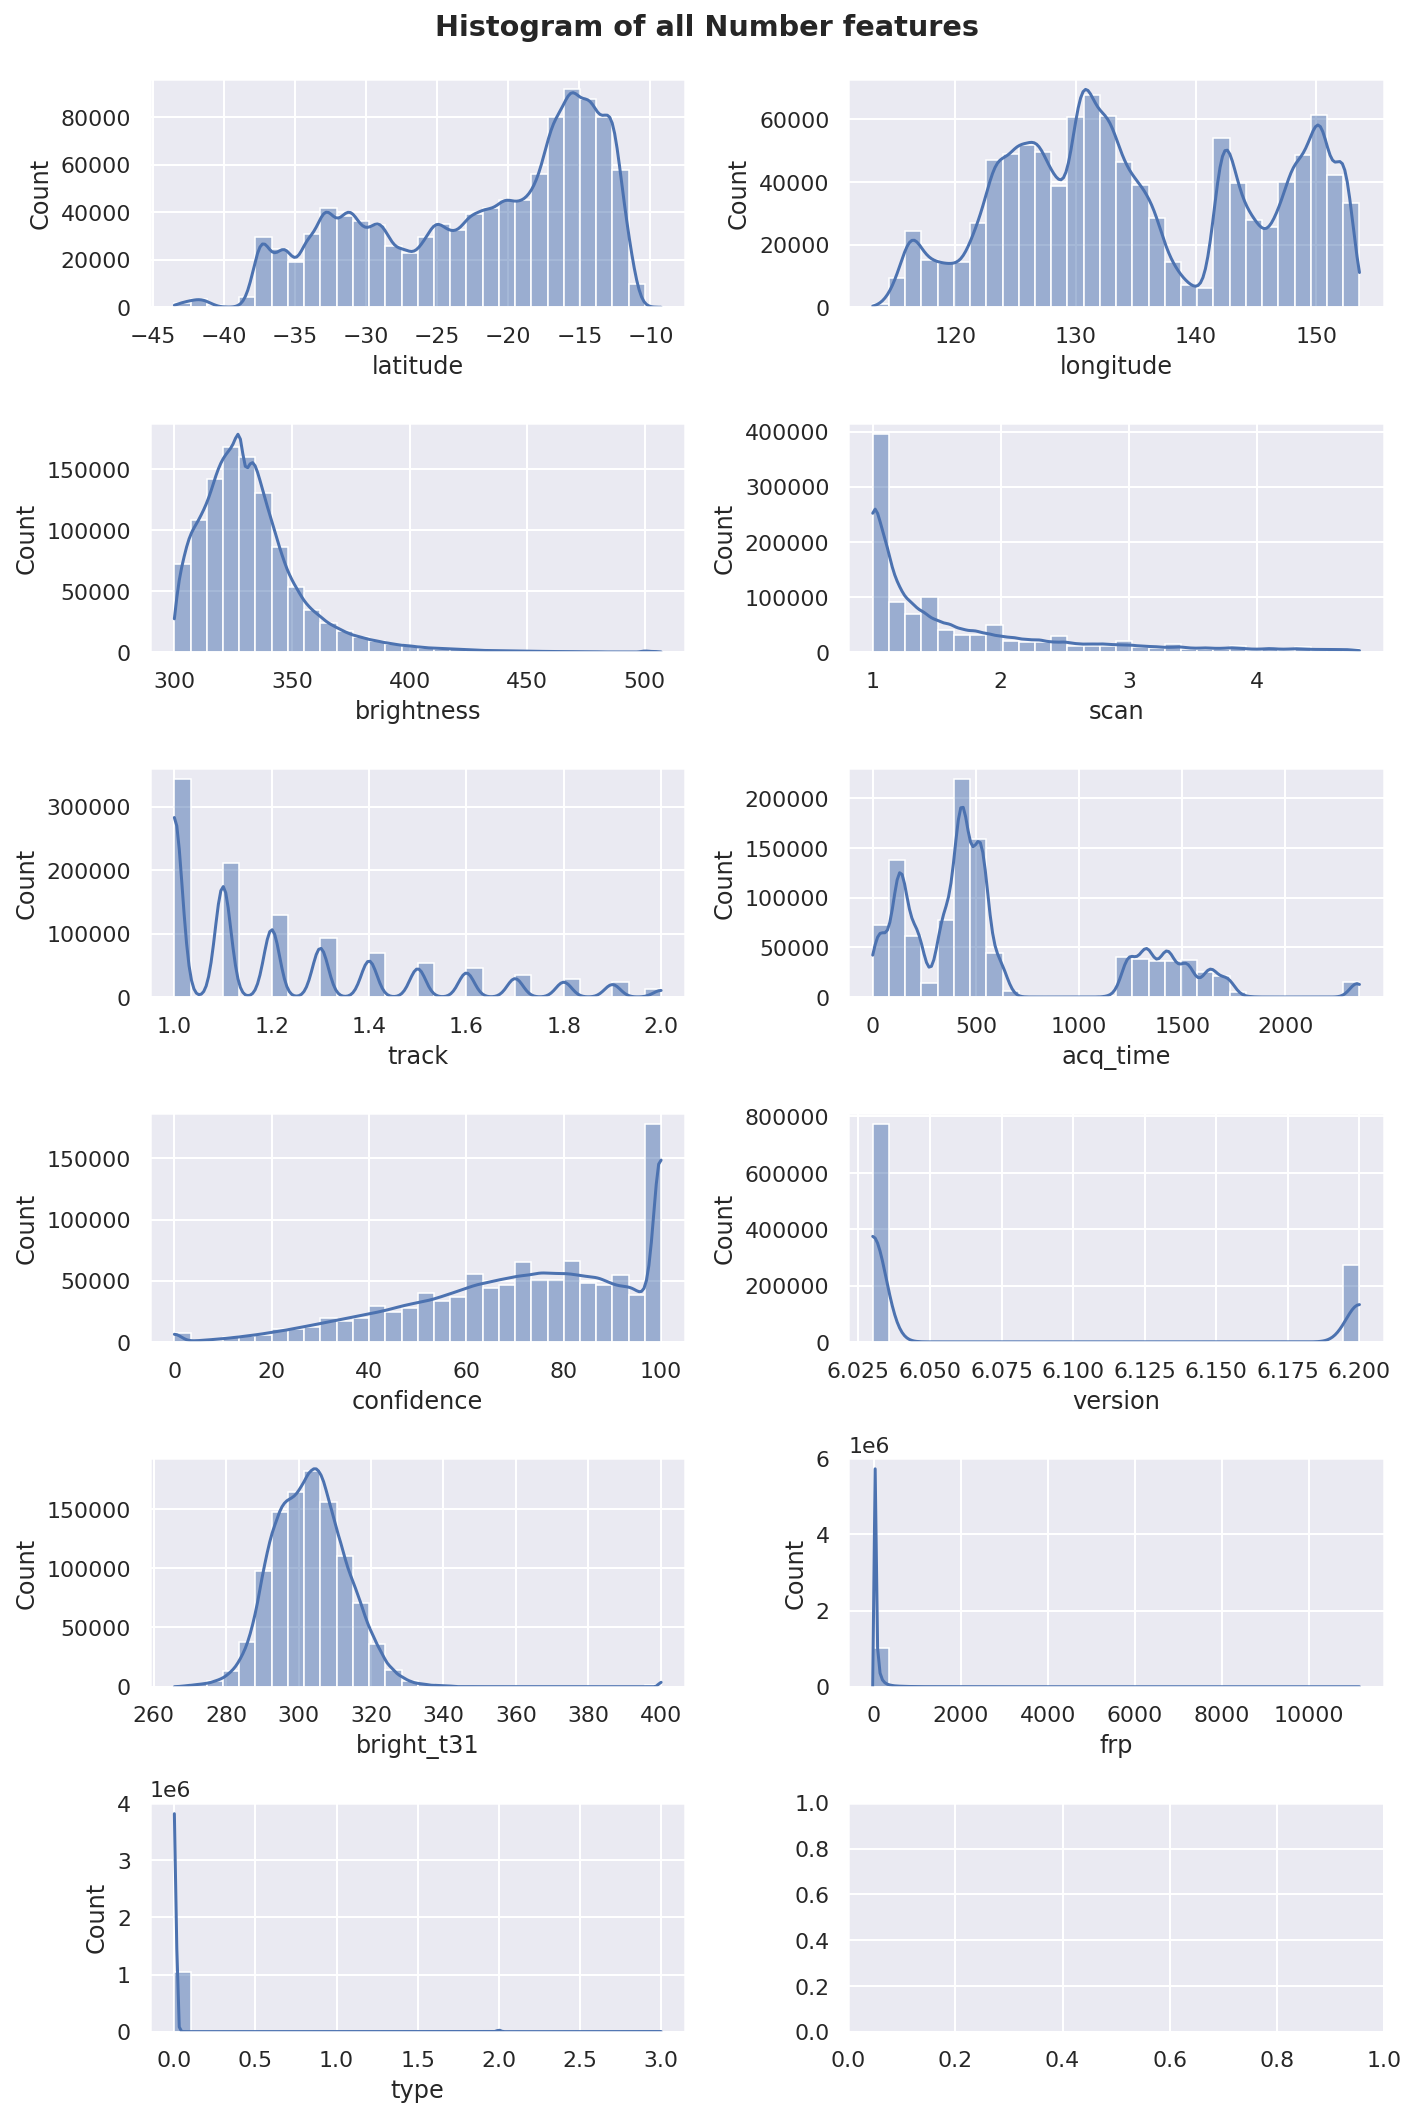

In [ ]:
ax = mulitple_function_plots(data=raw_data,plot_type="histogram",data_type="number")

##### a.4.1.b. Boxplot of all cont. features.<a class="anchor" name="task1_a_4_1_b"></a>
Boxplot is very good to show outliers and mathematical status of each cont. features.<br>
Such as median, max,min, 1st quartile and 3rd quartile.<br>
It will help us find most data quality issues.<br>

Those features will be plotted in  6  rows and 2 columns
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')
1 . Finish Rendering : latitude , used 212.341 millseconds
2 . Finish Rendering : longitude , used 491.937 millseconds
3 . Finish Rendering : brightness , used 843.107 millseconds
4 . Finish Rendering : scan , used 39.442 millseconds
5 . Finish Rendering : track , used 191.465 millseconds
6 . Finish Rendering : acq_time , used 337.265 millseconds
7 . Finish Rendering : confidence , used 301.986 millseconds
8 . Finish Rendering : version , used 320.014 millseconds
9 . Finish Rendering : bright_t31 , used 606.79 millseconds
10 . Finish Rendering : frp , used 947.951 millseconds
11 . Finish Rendering : type , used 929.143 millseconds


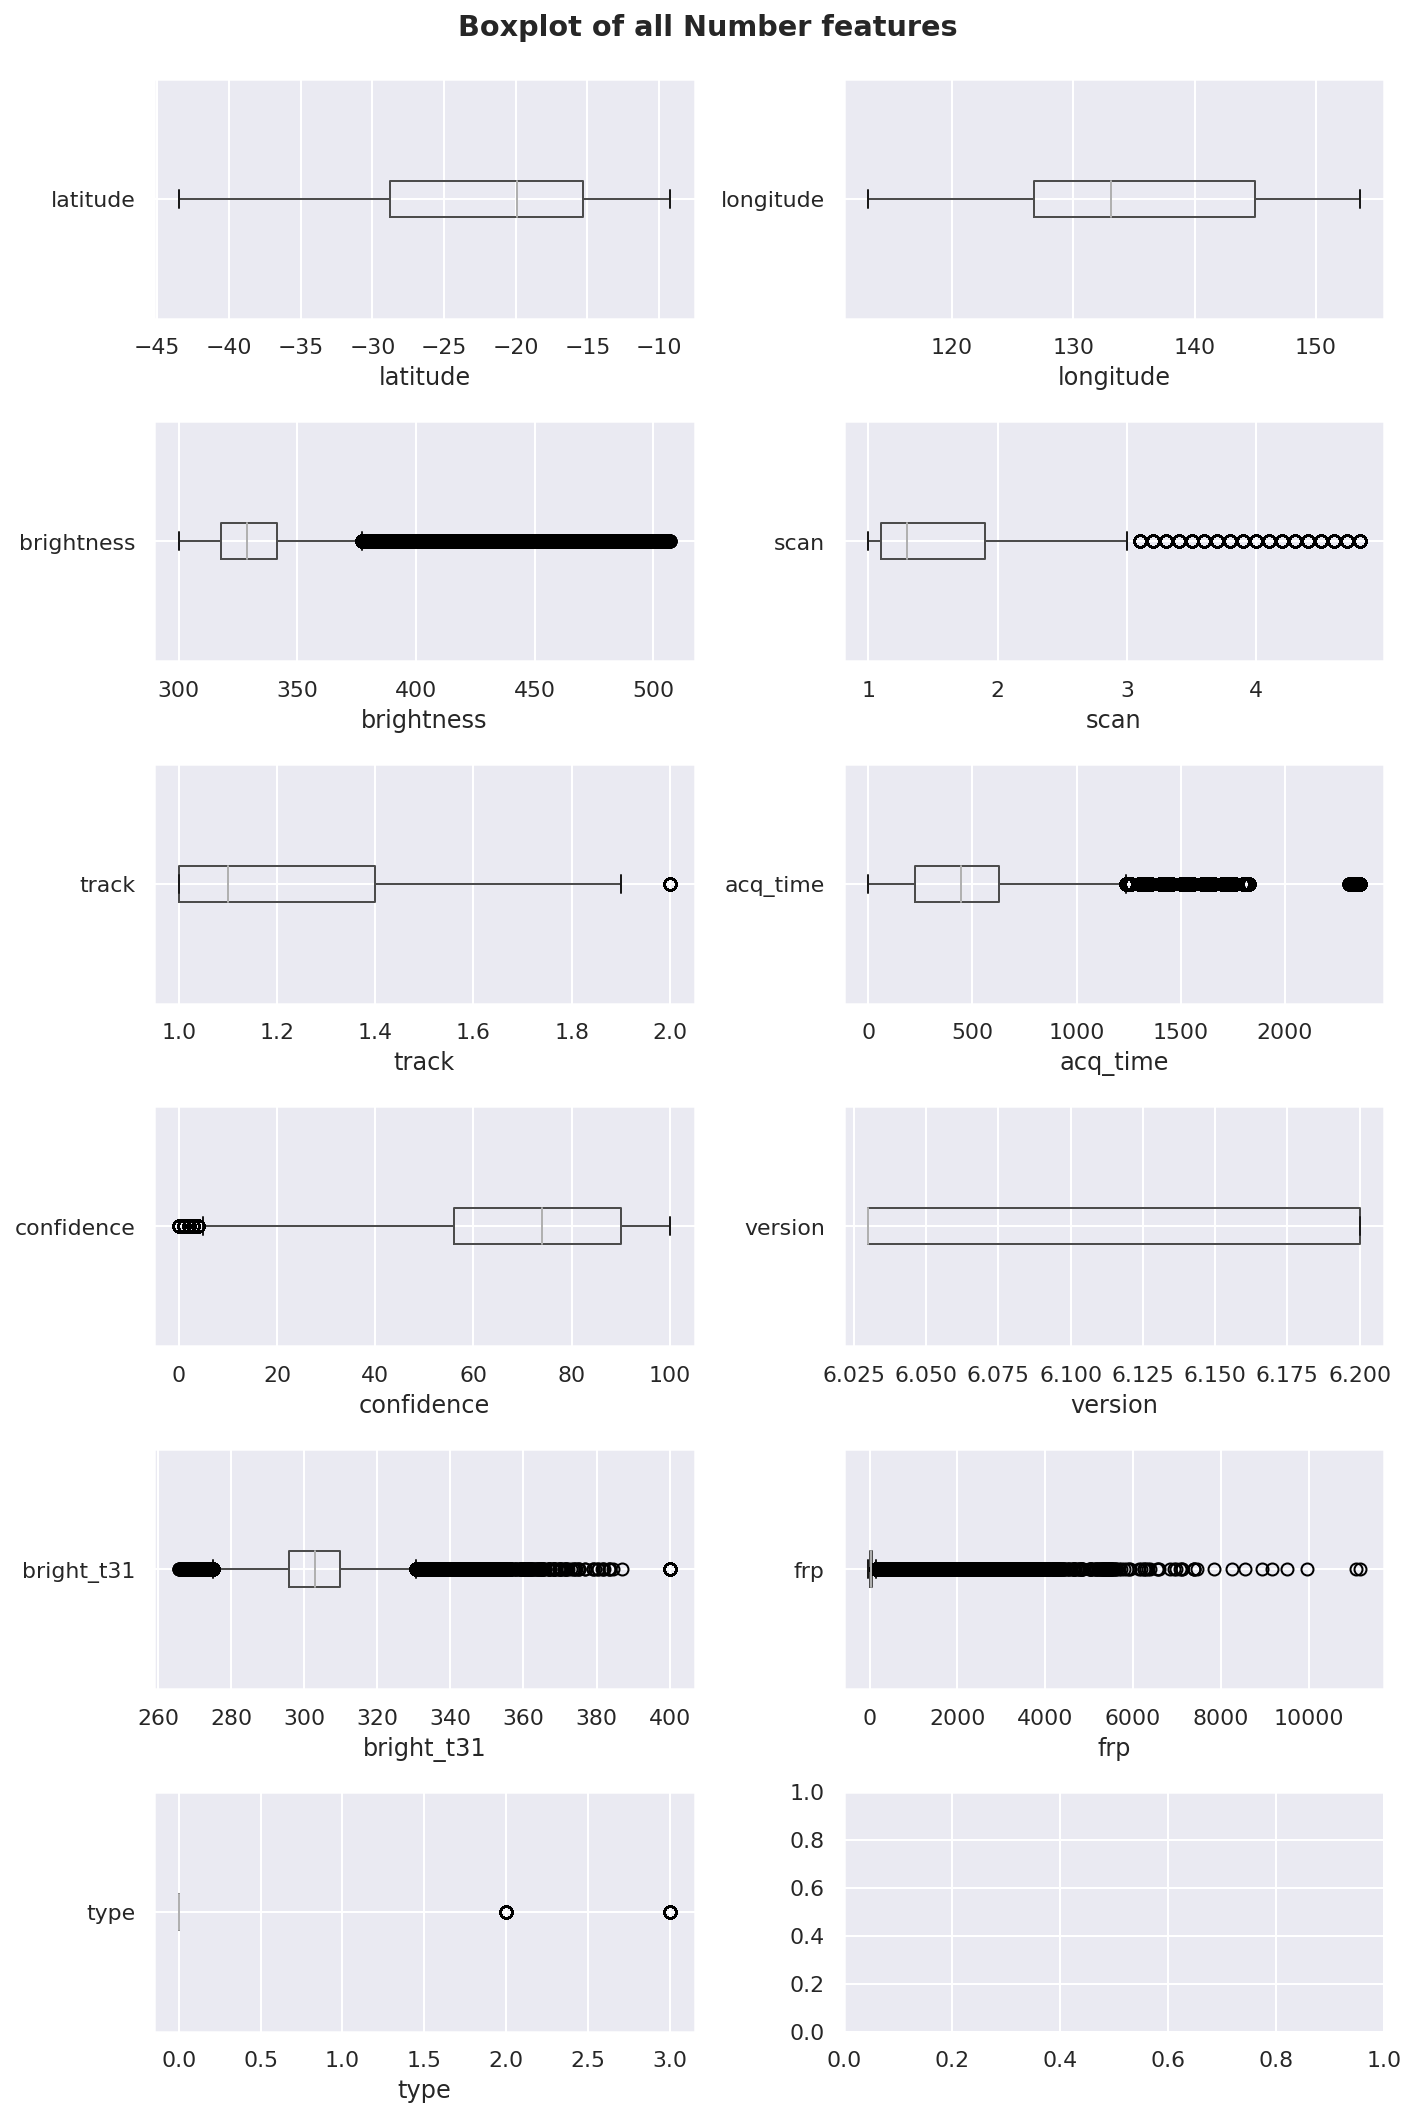

In [ ]:
ax = mulitple_function_plots(data=raw_data,plot_type="boxplot",data_type="number")

> We can see a lot of data quality issues. We will hand those soon


#### a.4.2. Categorical features<a class="anchor" name="task1_a_4_2"></a>
Plot barplot for categorical features.

> From above categorical data quality report, we already know that "acq_date" has cardinality 1461.<br>
Which is basically impossible to plot in a single bar plot, and plot a feature that we already know it has problem is not wise <br>
Hence, I drop the column of acq_data first. Plot the rest of them.


Those features will be plotted in  2  rows and 2 columns
Index(['satellite', 'instrument', 'daynight'], dtype='object')
1 . Finish Rendering : satellite , used 80.824 millseconds
2 . Finish Rendering : instrument , used 174.204 millseconds
3 . Finish Rendering : daynight , used 247.753 millseconds


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbec50b4e10>,
      dtype=object)

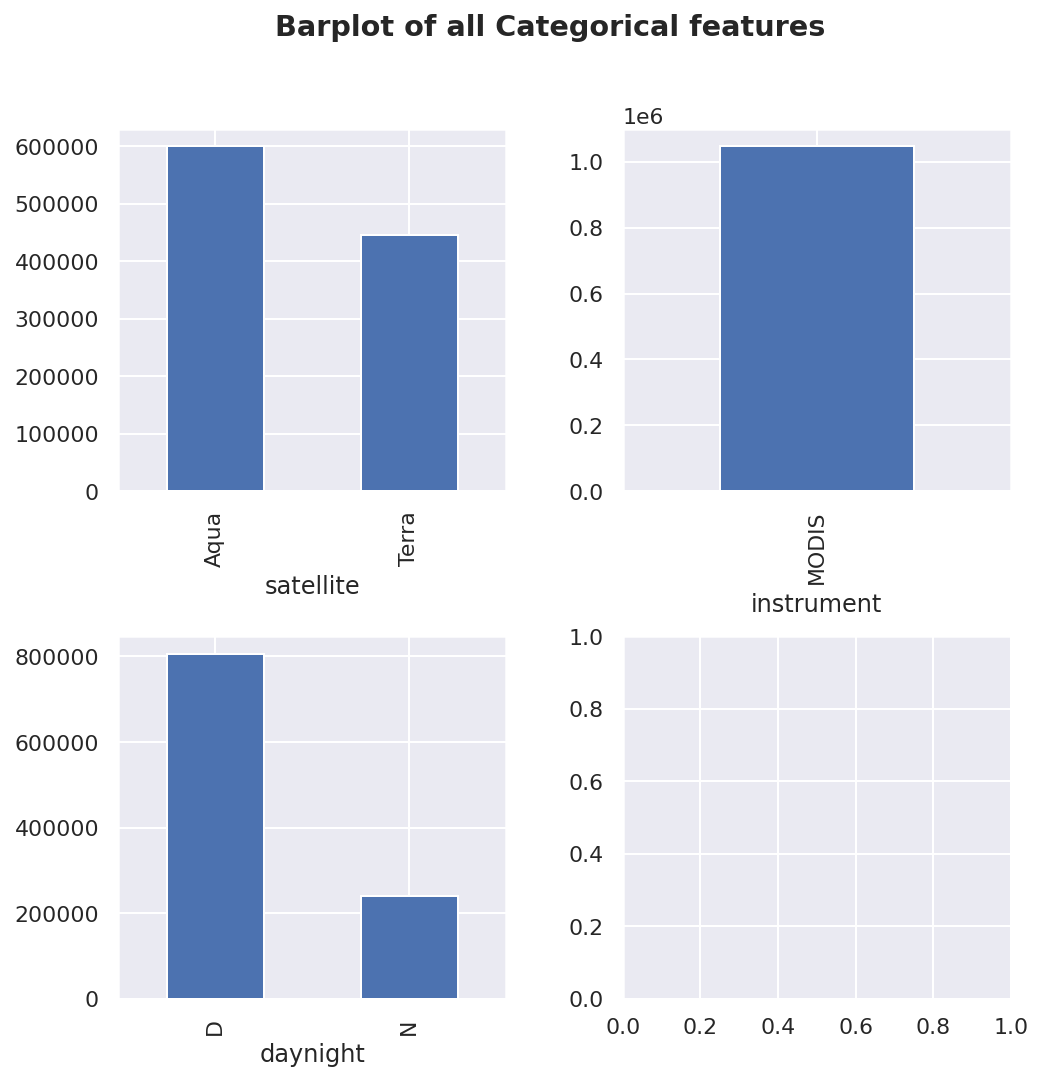

In [ ]:
mulitple_function_plots(tight_layout=False,fig_size=(8,8), 
                        data=raw_data.drop('acq_date',axis=1),plot_type='barplot',data_type='categorical')

We use histogram to plot acq_date:

In [ ]:
acq_date_col = pd.DataFrame(raw_data['acq_date'])

##### The following code needs a lot of time to run.

Text(0.5, 1.0, 'Histogram of acq date')

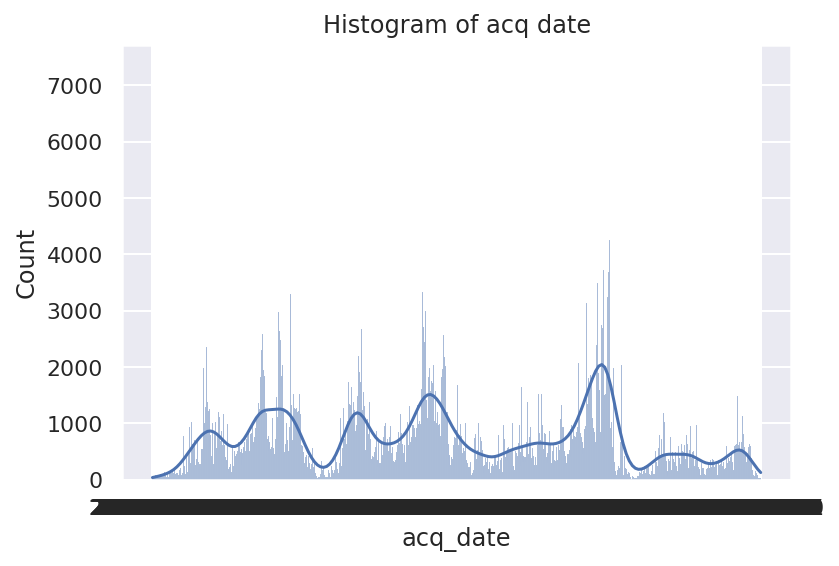

In [ ]:
sns.histplot(data=acq_date_col, x='acq_date', bins = 30,kde=True)
plt.title("Histogram of acq date")

That's not good.<br> It didn't follow my order to apply bin size 30.<br>
That's because acq_date is not a numerical data. <br>
Seaborn didn't and can not recognize its arithmetic value.
Then it can't count their order to form a bin.<br>
I am gonna use a trick to solve it before data preparation.
Use time series.

##### Time series plot

Text(0.5, 1.0, 'Histogram of acq_date by bin size 30')

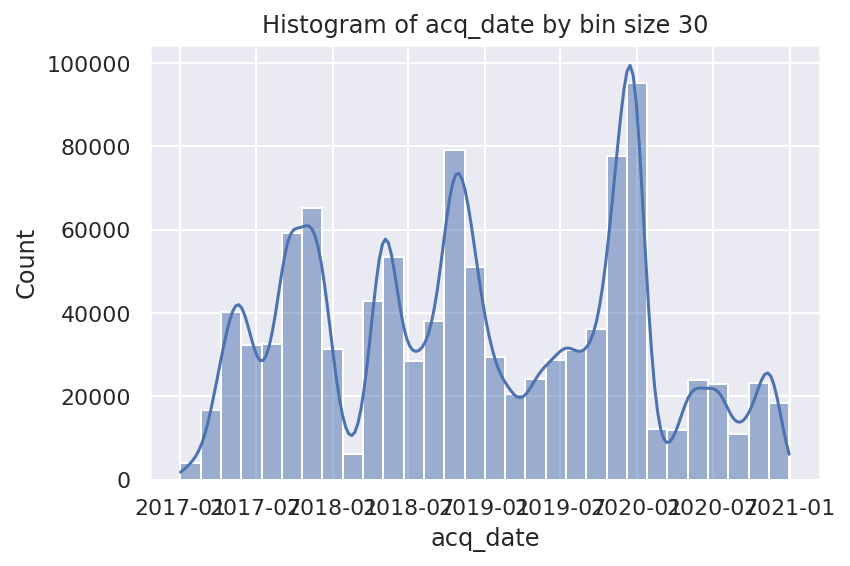

In [ ]:
acq_date_col = pd.to_datetime(acq_date_col['acq_date'], format= '%Y-%m-%d')
sns.histplot(data=acq_date_col, bins = 30,kde=True)
plt.title("Histogram of acq_date by bin size 30")

Not bad. But this is not I want. 
We will solve this problem later.

In [ ]:
acq_date_col.value_counts().head()

2020-01-04    7351
2019-12-30    6925
2019-12-19    4768
2020-01-02    4390
2020-01-03    4260
Name: acq_date, dtype: int64

Therefore, we know that on 2020-01-04, it has the highest number of accidents.
Since each accident will occupy one instance. Which day has the most number of instances, it has the highest number of accidents.

## b. Plot the heatmap correlation among the variables in the data<a class="anchor" name="task1_b"></a>

###### heatmap draw function archive. Real one in [Self-defined functions/Class in task 1](#func_task1)<br>

In [ ]:
def heatmap_draw(data):
    # Correlation between different variables
    corr = data.corr()
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(12, 10))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(corr, annot=True, cmap=cmap)
    plt.title("Heatmap correlation among all features")

#### Draw a heatmap<a class="anchor" name="task1_b_1"></a>

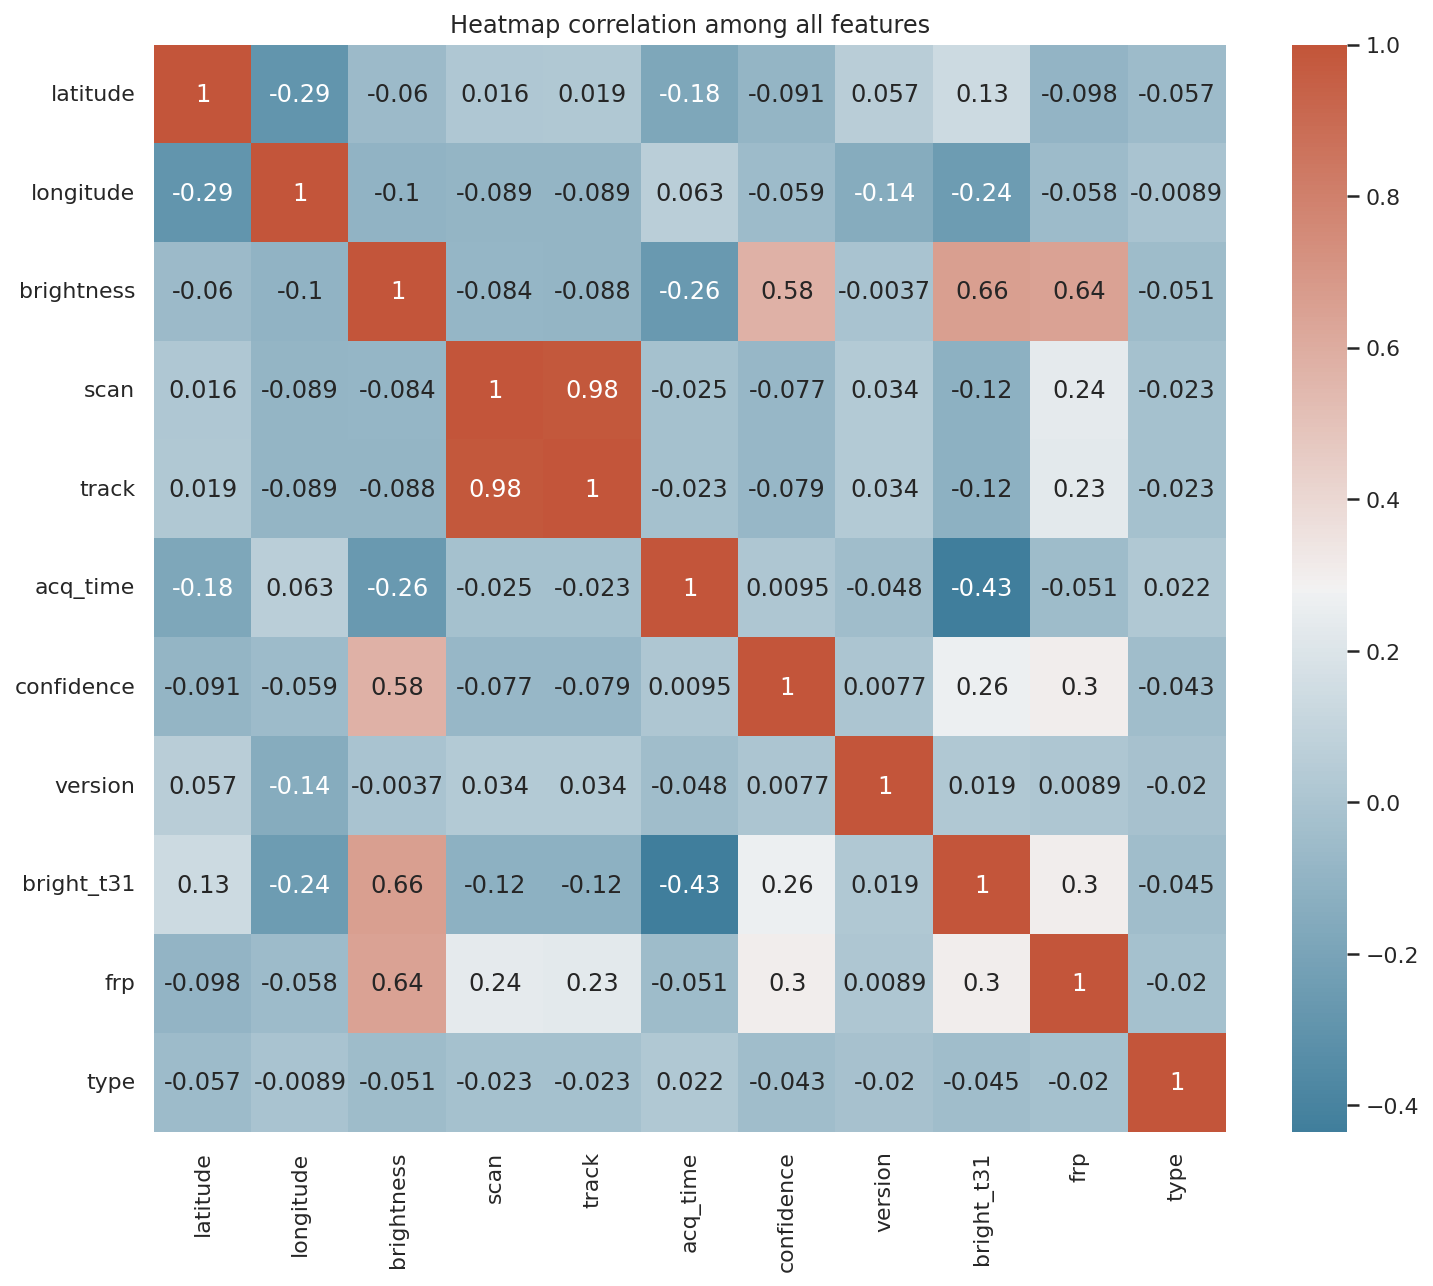

In [ ]:
heatmap_draw(raw_data)

###  Discard ## TODO <a class="anchor" id="todo_1"></a>

Note:
>Since we are dealing with spatial prediction, the location of a single event is mattered. <br> 
We have a few ways to represent the relation of two different points.<br>
For example, We can use Kriging Gaussian model to measure the relation between multiple points (Junbo Wang, ## TODO add citiation)

But we are not there yet. Still we need a way to measure the meaning of events' location.<br>
By doing a few experiments.<br> **I found the summation of latitude and longitude will sufficiently represent a point's location. If their summation is the same after rounding to integer, most likely there are near by to each other.**  This trick will not work worldwide. 
<br> However, we are not working on a worldwide data set. It gives me the chance to add a new feature and re-do the correlation map again.

In [ ]:
data_with_sum_lat_and_long = raw_data.copy()

In [ ]:
data_with_sum_lat_and_long.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
data_with_sum_lat_and_long['location'] = data_with_sum_lat_and_long['latitude'] + data_with_sum_lat_and_long['longitude']
data_with_sum_lat_and_long['location'] = data_with_sum_lat_and_long['location'].round(0)
max_print_out(False)
loca_archive = data_with_sum_lat_and_long['location']
loca_archive.value_counts()

121.00    59198
120.00    54663
119.00    50356
118.00    41859
116.00    40315
          ...  
92.00      3271
88.00      2876
81.00       659
132.00      260
133.00       17
Name: location, Length: 53, dtype: Int64

In [ ]:
location_sum_distributioin = (data_with_sum_lat_and_long['location'].value_counts()).index.tolist()
print("We now have a new feature with cad " , len(location_sum_distributioin))

We now have a new feature with cad  53


In [ ]:
location_sum_distributioin

[121.0,
 120.0,
 119.0,
 118.0,
 116.0,
 123.0,
 122.0,
 112.0,
 113.0,
 111.0,
 127.0,
 117.0,
 115.0,
 124.0,
 110.0,
 106.0,
 105.0,
 128.0,
 125.0,
 108.0,
 114.0,
 109.0,
 104.0,
 126.0,
 129.0,
 107.0,
 103.0,
 130.0,
 101.0,
 98.0,
 102.0,
 100.0,
 99.0,
 97.0,
 95.0,
 96.0,
 86.0,
 85.0,
 93.0,
 84.0,
 94.0,
 91.0,
 89.0,
 87.0,
 90.0,
 131.0,
 83.0,
 82.0,
 92.0,
 88.0,
 81.0,
 132.0,
 133.0]

In [ ]:
sum = len(loca_archive);sum

1046679

In [ ]:
#  for i in location_sum_distributioin:
value = len(location_sum_distributioin)
for i, item in enumerate(location_sum_distributioin):
    print(item)
    loca_archive[loca_archive == item] = (1/float(1+np.exp(-loca_archive.value_counts().iloc[i]/sum)))
    value -= 1

121.0
120.0
119.0
118.0
116.0
123.0
122.0
112.0
113.0
111.0
127.0
117.0
115.0
124.0
110.0
106.0
105.0
128.0
125.0
108.0
114.0
109.0
104.0
126.0
129.0
107.0
103.0
130.0
101.0
98.0
102.0
100.0
99.0
97.0
95.0
96.0
86.0
85.0
93.0
84.0
94.0
91.0
89.0
87.0
90.0
131.0
83.0
82.0
92.0
88.0
81.0
132.0
133.0


In [ ]:
max_print_out(True)
data_with_sum_lat_and_long['location'].value_counts()

0.51    59198
0.51    54663
0.51    50356
0.51    41859
0.51    40315
0.51    38255
0.51    37533
0.51    37448
0.51    34311
0.51    34070
0.51    33538
0.51    32243
0.51    30009
0.51    29503
0.51    28610
0.51    27960
0.51    27019
0.51    25989
0.51    23900
0.51    23051
0.51    22707
0.51    21975
0.51    21753
0.51    21448
0.51    21029
0.50    18032
0.50    16042
0.50    15603
0.50    15577
0.50    14076
0.50    13165
0.50    12462
0.50    11851
0.50    10140
0.50     9593
0.50     8907
0.50     8778
0.50     8688
0.50     7970
0.50     7787
0.50     7536
0.50     6428
0.50     4985
0.50     4945
0.50     4864
0.50     4834
0.50     4801
0.50     3790
0.50     3271
0.50     2876
0.50      659
0.50      260
0.50       17
Name: location, dtype: Int64

In [ ]:
data_with_sum_lat_and_long = data_with_sum_lat_and_long.drop('location',axis=1)

In [ ]:
data_with_sum_lat_and_long['location'] = loca_archive

In [ ]:
data_with_sum_lat_and_long['location'].value_counts()

0.51    59198
0.51    54663
0.51    50356
0.51    41859
0.51    40315
0.51    38255
0.51    37533
0.51    37448
0.51    34311
0.51    34070
0.51    33538
0.51    32243
0.51    30009
0.51    29503
0.51    28610
0.51    27960
0.51    27019
0.51    25989
0.51    23900
0.51    23051
0.51    22707
0.51    21975
0.51    21753
0.51    21448
0.51    21029
0.50    18032
0.50    16042
0.50    15603
0.50    15577
0.50    14076
0.50    13165
0.50    12462
0.50    11851
0.50    10140
0.50     9593
0.50     8907
0.50     8778
0.50     8688
0.50     7970
0.50     7787
0.50     7536
0.50     6428
0.50     4985
0.50     4945
0.50     4864
0.50     4834
0.50     4801
0.50     3790
0.50     3271
0.50     2876
0.50      659
0.50      260
0.50       17
Name: location, dtype: Int64

Not bad. We just made a new categorical feature.
 ## TODO: not decide what to do yet.

In [ ]:
type(data_with_sum_lat_and_long['location'].loc[0])

numpy.float64

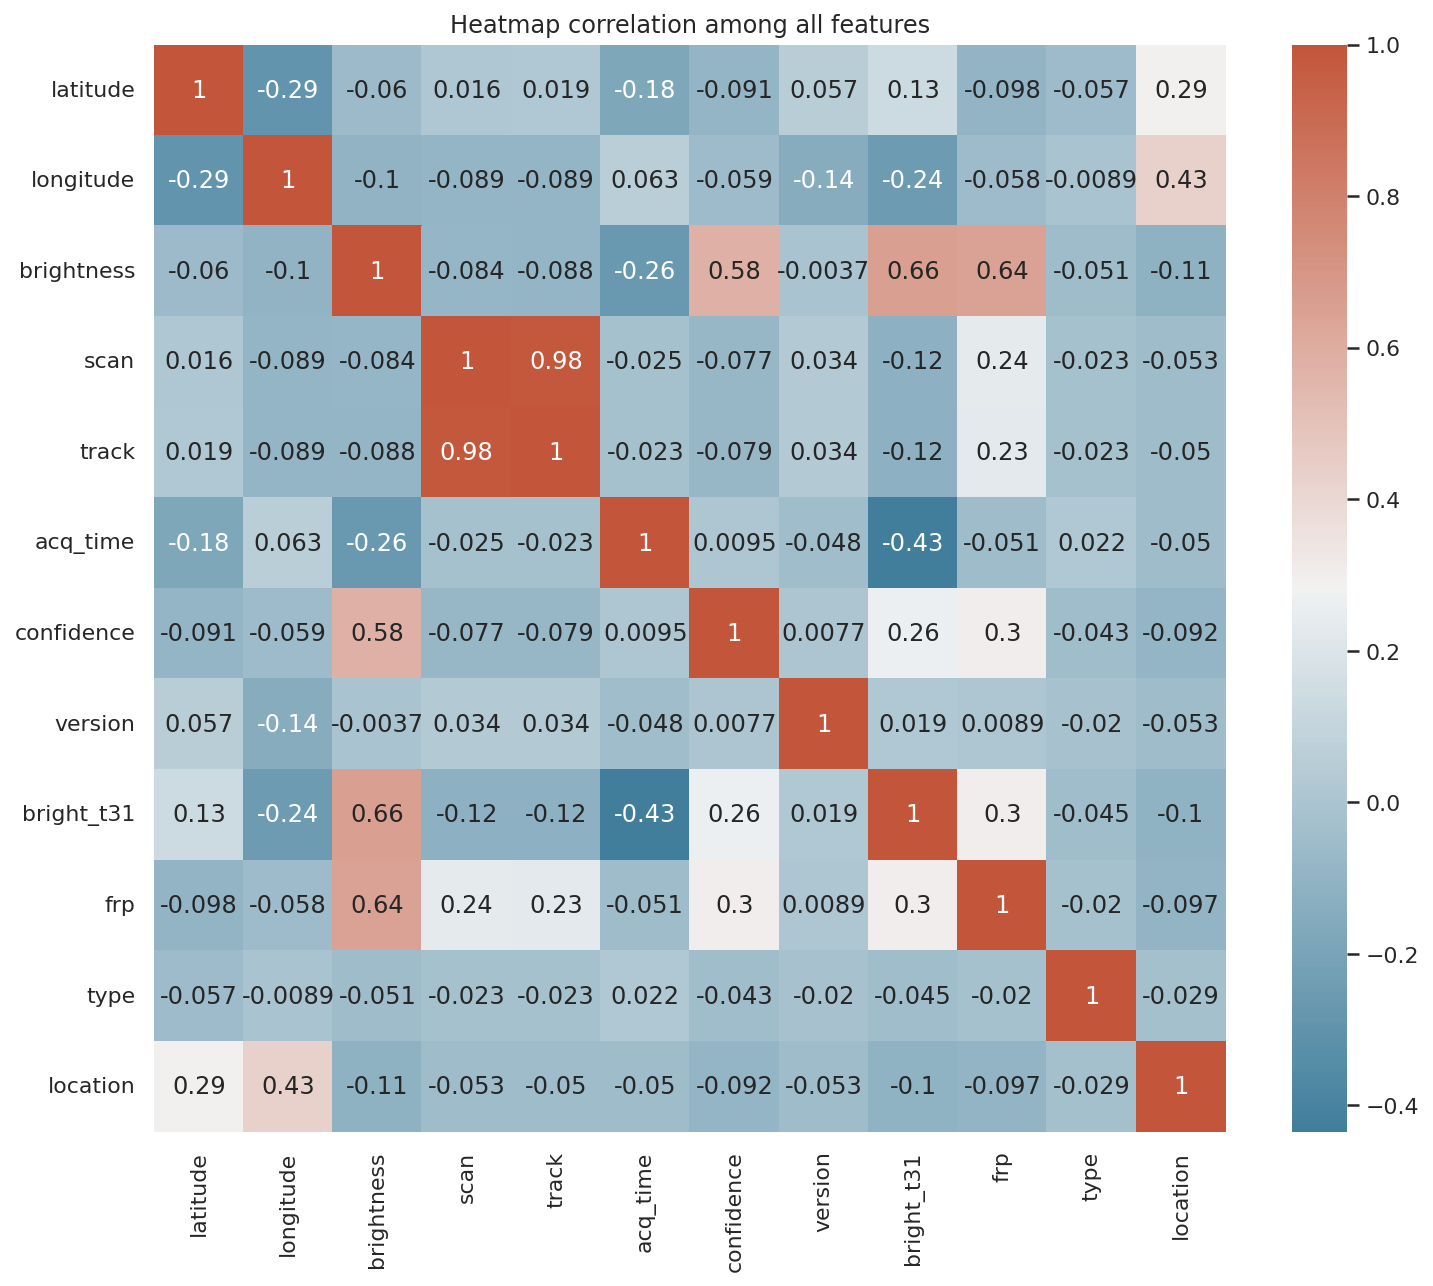

In [ ]:
heatmap_draw(data_with_sum_lat_and_long)

## c. (CWR) Identify data quality issues and build the data quality plan<a class="anchor" name="task1_c"></a>
  

#### c.0. Utility functions<a class="anchor" name="task1_c_0"></a>
> Archive for easy to use

In [ ]:


#-------------  detect and delete outliers -----------------------------------------------------

def find_outliers(data_df, parameter,* , drop=False, set_threshold=False, threshold_value = 10): # deal with outliers
    
    '''detect and delete outliers '''
    Q1 = data_df[parameter].quantile(0.25)
    Q3 = data_df[parameter].quantile(0.75)
    IQR = Q3-Q1
    print(f"IQR = {Q3} - {Q1} = {IQR}")
    print(f"MAX = {(Q3 + 1.5 * IQR)}")
    
    if Q1 > 1.5*IQR :
        print("Min: ", (Q1 - 1.5 * IQR))
    else:
        print("Min is 0")
    
    cut_out_value =  (Q3 + 1.5 * IQR)
    if set_threshold == True:
        cut_out_value = threshold_value
        
    min_outliers_df = data_df[(data_df[parameter] < (Q1 - 1.5 * IQR))]
    max_outliers_df = data_df[(data_df[parameter] > cut_out_value)]           
    print("Num of min outliers: ", len(min_outliers_df))
    print("Num of max outliers: ", len(max_outliers_df))
    if drop:
        return data_df.drop(max_outliers_df.index)


#------------- Add features -----------------------------------------------------

def feature_add():
  ''' Add features'''
  purge_data['location'] = purge_data['longitude'] + purge_data['latitude']
  purge_data['location'] = purge_data['location'].round(0)


################################  CLASS  ################################

# Class for data transformer
# import important libray
from sklearn.base import BaseEstimator, TransformerMixin

class data_cleaner(BaseEstimator, TransformerMixin):
    '''data clean transfomer class'''
    
    def __init__(self, data_clean = False): # no *args or **kargs
        self.data_clean = data_clean
        
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        # Start to change all string columns that related to Dates to Time Series
        minutes = X['acq_time'] % 100
        hours = (X['acq_time'] /100).astype(int) 
        #concatenate 
        X['acq_date'] =  X['acq_date'] + '-'  + hours.apply(str) + "-" + minutes.apply(str)
        X['acq_date'] = pd.to_datetime(X['acq_date'], format= '%Y-%m-%d-%H-%M')
        X = X.set_index('acq_date')
        
        if self.data_clean:
            # Transter categorical data to numerical value
            # Start to apply one hot encoding
            statelitte = pd.get_dummies(X.satellite)
            daynight = pd.get_dummies(X.daynight)
            X = pd.concat([X,statelitte,daynight], axis=1)
            X = X.drop(['acq_time', 'instrument','version','satellite','daynight'],axis=1) 
            return X
        else:
          return X
        
#############################################################################   

    


### c.1. Data quality issues table<a class="anchor" name="task1_c_1"></a>

| Continuous Feature   | Data Quality Issue  | Potential Handling Strategies  |
 |  ----  |          ----   |              --- |
| frp  | Outliers' values are too large | Need to assign value to outliers/Drop all outliers |
| acq_time  | Not meaningful. Extension of acq_date | Concatenate with acq_time|
| scan  | Low cardinality for cont. features | Further analysis (Found interesting correlation)  |
| track  | Low cardinality for cont. features | Further analysis  (Found interesting correlation) |
| version  | Categorical value | Not a very useful feature. Drop it  |
|  brightness | Has many outliers | No action until more data analysis |
|  confidence | A lot of large values at the right end  | Handle later |
|  Type | Cardinality = 3 and not very meaningful | change to categorical data/ Drop it |

---
Since we are predicting a value in our task. Then in a regression model. We need to covert categorical data to a continuous form.

| Categorical Feature   | Data Quality Issue  | Potential Handling Strategies  |
|  ----  |          ----   |              --- |
|  acq_date | High Cardinality/Not a categorical data | Change to Times Series format |
|  satellite | String | One hot encoding |
|  instrument | Cardinality equal to 1/ Not useful | Drop |
|  daynight |String | One hot encoding |





> In this project, I choose "frp" as my target value. The following data analysis step will follow frp as top priority.

#### c.1.1 Identify the problem<a class="anchor" name="task1_c_1.1"></a>  
Now let's figure out what problem we have now.


[back to top](#top)

##### c.1.1.1 FRP target value investigation <a class="anchor" name="task1_c_1.1.1"></a>  
First we plot the histogram again.

Text(0.5, 0, 'frp')

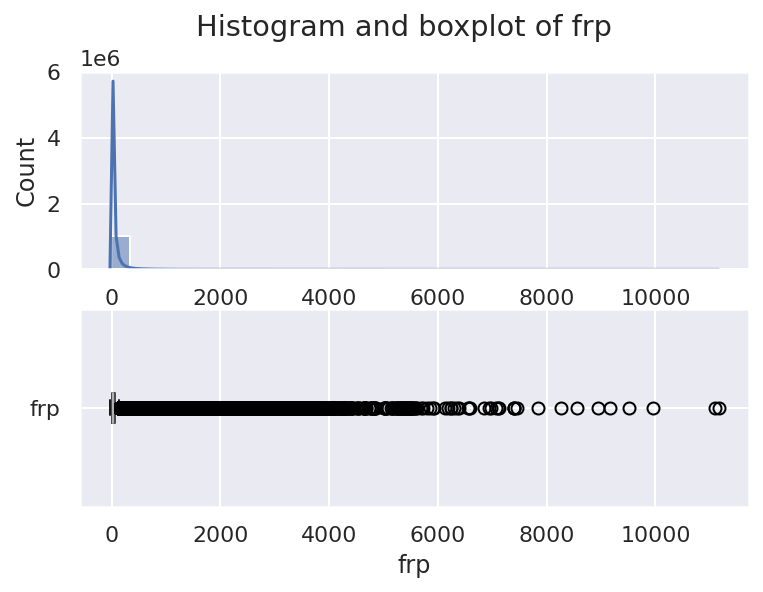

In [ ]:
fig, axs = plt.subplots(2)
sns.histplot(data=raw_data, x='frp', bins = 30,kde=True, ax=axs[0])
raw_data.boxplot(column='frp',ax=axs[1], vert=False)
fig.suptitle("Histogram and boxplot of frp")
plt.xlabel("frp")

We can clearly see that the main range of frp's value lays between 0 to way less than 1000. <br>
And its maximum value up to 10000. <br>

From our course, we know that the CRISP-DM process, the first part and most important part is Business understanding.
It should come first before Data understand.

![picture](https://drive.google.com/uc?export=view&id=1uOwvYqo6P11Y5AVszMFVq4ueS9RzT-U3)


After seeing this very unusual distribution, I did a little bit search online.
It turns out during July, August 2019 – April, May 2020, there is a huge bushfire happened in Australia.
The scale of this wildfire has never seen before by any human records.
It costs approximately over 103 million dollars lost.
> 2019–20 Australian bushfire season
In June 2019 the Queensland Fire and Emergency Service acting director warned of the potential for an early start to the bushfire season which normally starts in August. The warning was based on the Northern Australia bushfire seasonal outlook noting exceptional dry conditions and a lack of soil moisture, combined with early fires in central Queensland.[17] Throughout the summer, hundreds of fires burnt, mainly in the southeast of the country. The major fires peaked during December–January.(Wikipedia https://en.wikipedia.org/wiki/2019%E2%80%9320_Australian_bushfire_season) <div>

![picture](https://drive.google.com/uc?export=view&id=1W4adEw0K38-JgMb_74Z3e2orN0z4j6Fo)


And unfortunately, Australia has multiple kinds of huge bushfires every year. <br>
We know that our target value is frp
> (Fire Radiative Power)
FRP depicts the pixel-integrated fire radiative power in MW (megawatts). Given the unique spatial and spectral resolution of the data, the VIIRS 375 m fire detection algorithm was customized and tuned in order to optimize its response over small fires while balancing the occurrence of false alarms. Frequent saturation of the mid-infrared I4 channel (3.55-3.93 µm) driving the detection of active fires requires additional tests and procedures to avoid pixel classification errors. As a result, sub-pixel fire characterization (e.g., fire radiative power [FRP] retrieval) is only viable across small and/or low-intensity fires. Systematic FRP retrievals are based on a hybrid approach combining 375 and 750 m data. In fact, starting in 2015 the algorithm incorporated additional VIIRS channel M13 (3.973-4.128 µm) 750 m data in both aggregated and unaggregated format.(Kaggle dataset description https://www.kaggle.com/datasets/brsdincer/australia-and-investigative-special-wildfires-data)

In a short way to describe the above, it is a scalar value related to measure how big a fire is.
But due to every year's exremely large bushfires, this value will become way higher than the normal wildfires.


And the process of calculating FRP by a few pixels is not a easy task.

> Indented block


David Peterson wrote an article about how to do it, which is also related to our project.
By this graph, we know that all features are not quite independent to each other. This make will our prediction model become extremely hard to get a good score.
> (Peterson, D., &amp; Wang, J. (2013). A sub-pixel-based calculation of fire radiative power from MODIS OBSERVATIONS: 2. sensitivity analysis and potential fire weather application. Remote Sensing of Environment, 129, 231–249. https://doi.org/10.1016/j.rse.2012.10.020 )

![picture](https://drive.google.com/uc?export=view&id=1AX60yajTwU2PbF7qD0p1RbgwLVW9W_LP)


After identified this significant phenomena, we move on to data understanding.<br> From the textbook, we know we can not train a model even if the data set is vaild and have significantly outliers. In our case, it is exactly the same.
<br> **Hence, my main idea to solve those outliers is to drop them all.**
Since when our data set across multiple years, the performance will decrease and if we use one year to predict another year, we got mismatch problem. Those problems are really and will reflect in the training process.

> For example, we cannot train error-based models with data that contains missing values, and data that contains outliers significantly damages the performance of similarity-based
models. (Kelleher, Textbook 2, Fundamentals of ML for Predictive Data Analytics_ Algorithms, Worked Examples, and Case Studies)

We probably all know the most famous slogan in deep learning, "Garbage in, Garbage out". <br>
We can't feed our training model with something it can not understand. This will simply cost money, time and our mind.<br>
Now, we take a step further on "frp" in 2020's data set

Text(0.5, 0, 'frp')

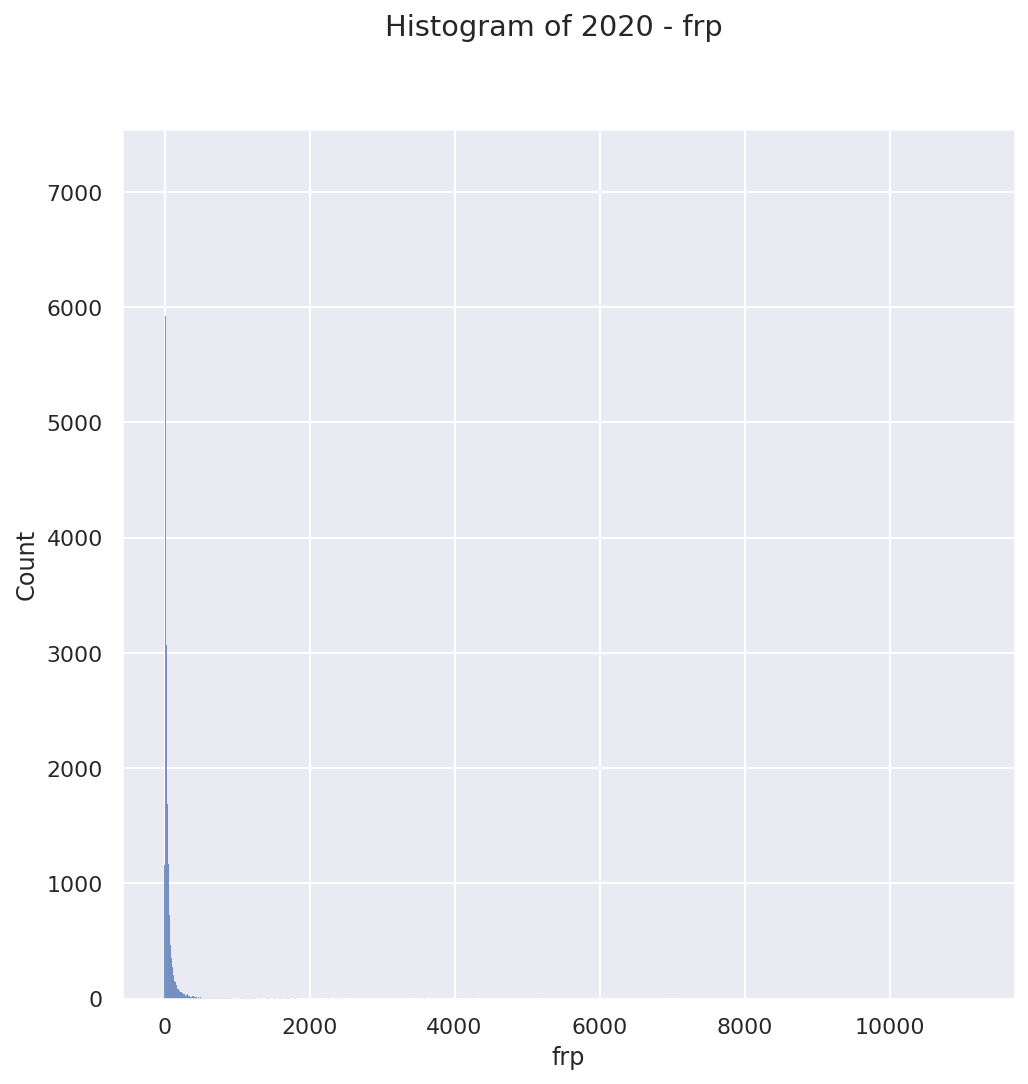

In [ ]:
# load sub data set


raw_data_2020 = pd.read_csv("modis_2020_Australia.csv")
fig, axs = plt.subplots(figsize=(8,8))
sns.histplot(data=raw_data_2020, x='frp')
fig.suptitle("Histogram of 2020 - frp")
plt.xlabel("frp")

The histogram plot of 2020's frp. But we can see there are not too many details from 2000 to 10000

Next I used ArcGIS PRO, (provided by Dalhousie license) to draw a few plots to identify what we are facing at the data quality issue stage. This application is wildly used by data scientist who works in geography area. It shows great details among large dataset. I will change my tool back to python after we drop some instances.

--- 

The heatmap graph shows the geographical heat map of year 2017.(The huge bushfire made 2020 heat map really hard to identify any useful information. All areas in Australia are bright yellow)
And the top right graph shows the same graph we just plotted, with much more details. We can see that after 4000 they are all discrete points lays on 5000 to 100000.

![picture](https://drive.google.com/uc?export=view&id=1QwGIvO9sGi32-mVlkVYoWXAe1NYF-5wo)



From the aboving two grpahs, "change in data counts over acq_date", "Comparision of mean ftp by acq_date". <br>
We can see the maximum value of frp in a single day is follow the same distribution of the counts of instance in the same day. Which indicates that a huge wildfire often causes larger fire activity. And by Google it,  December 2019 to January 2020, exactly the same bushfire we talked before. It happened in this time period. The biggest one.

This explains why we have so much outliers in frp -- large scale bushfires.

But our model, my knowledge about fire activity are too shallow to solve this practical problem. Further investigation may apply, but for now I will drop it.

Hence, I did a few experiments about these features' purging to test my assumption before any further moves. <br>
The results are very pleasure to see. <br>
We change our data back to all four years.

First, we try to get the FRP distribution by our insights instead of the math to find outliers.
1. All frp less than 4000.

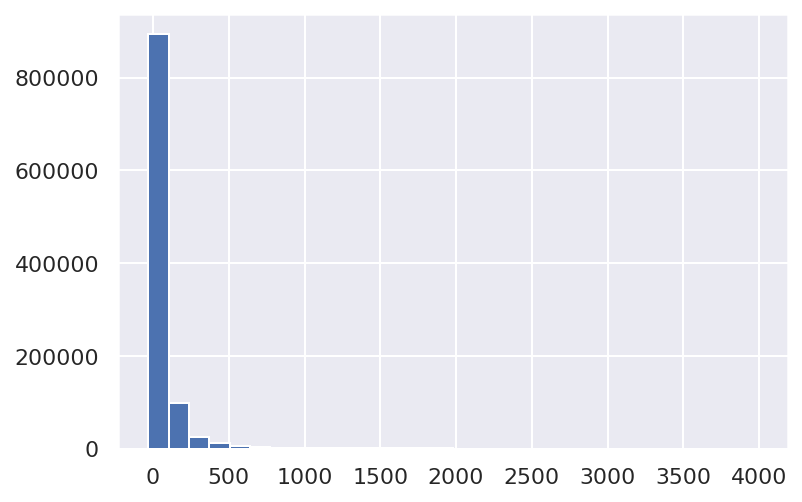

In [ ]:
(raw_data[(raw_data['frp'] < 4000)]).frp.hist(bins=30)

Well, pretty bad still. but much better than before.<br> 


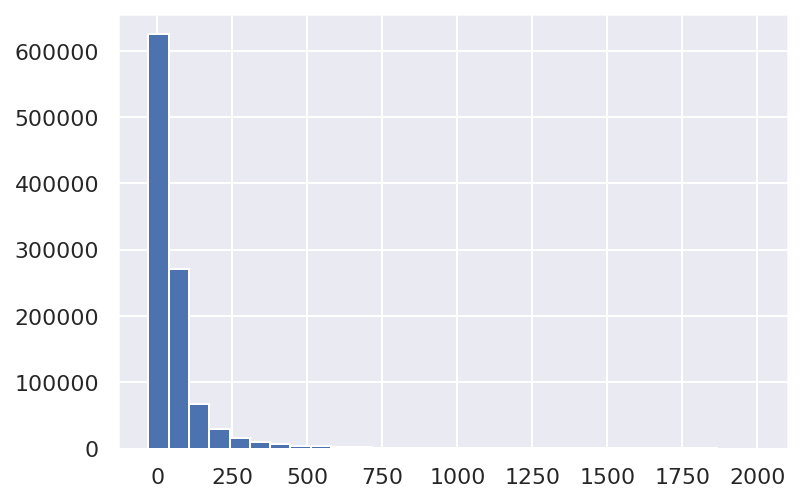

In [ ]:
# when less than 2000
(raw_data[(raw_data['frp'] < 2000)]).frp.hist(bins=30)

We start to see what its distribution is.

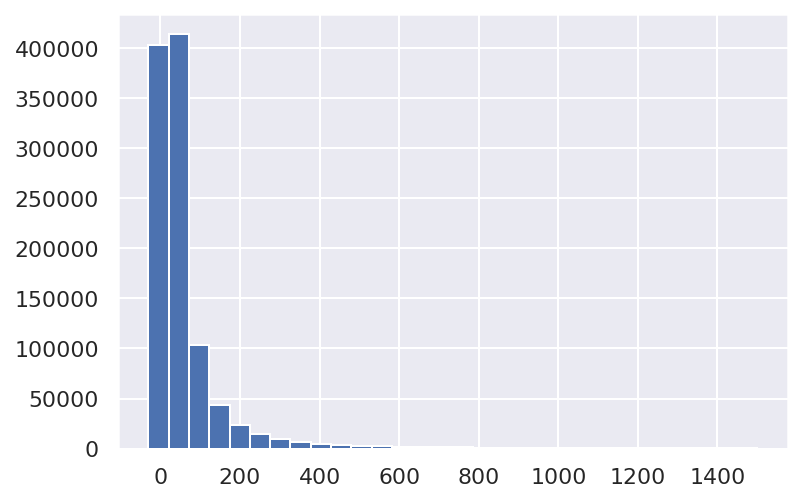

In [ ]:
# less than 1500
(raw_data[(raw_data['frp'] < 1500)]).frp.hist(bins=30)

###### Not a big difference. It's time to use our function to find its IQR values.
> Click this to see function the most updated version [Utility functions](#task1_c_0)

In [ ]:


#-------------  detect and delete outliers -----------------------------------------------------

def find_outliers(data_df, parameter,drop=False, set_threshold=False, threshold_value = 10): # deal with outliers
    
    '''detect and delete outliers '''
    Q1 = data_df[parameter].quantile(0.25)
    Q3 = data_df[parameter].quantile(0.75)
    IQR = Q3-Q1
    print(f"IQR = {Q3} - {Q1} = {IQR}")
    print(f"MAX = {(Q3 + 1.5 * IQR)}")
    
    if Q1 > 1.5*IQR :
        print("Min: ", (Q1 - 1.5 * IQR))
    else:
        print("Min is 0")
    
    cut_out_value =  (Q3 + 1.5 * IQR)
    if set_threshold == True:
        cut_out_value = threshold_value
        
    min_outliers_df = data_df[(data_df[parameter] < (Q1 - 1.5 * IQR))]
    max_outliers_df = data_df[(data_df[parameter] > cut_out_value)]           
    print("Num of min outliers: ", len(min_outliers_df))
    print("Num of max outliers: ", len(max_outliers_df))
    if drop:
        return data_df.drop(max_outliers_df.index)


###### Show outliers. 

In [ ]:
find_outliers(raw_data,'frp',False)

IQR = 63.5 - 14.6 = 48.9
MAX = 136.85
Min is 0
Num of min outliers:  0
Num of max outliers:  111537


Surprising result! Our frp outiler maximum values is only 136.85!!!


Let's find out the data set's max value

In [ ]:
raw_data.frp.max()

11164.1

11164!!!, not a chance we can train this model. 
> It is likely that outliers found using the second approach are valid outliers, so they are
a data quality issue due to valid data. Some machine learning techniques do not perform
well in the presence of outliers, so we should note these in the data quality plan for possible
handling later in the project. (Textbook 2, Kelleher)

In [ ]:
len(raw_data)

1046679

We have 1046679, a million instances, and have 11,1547 outliers. I would say its a good trade off at least in this stage of learning.

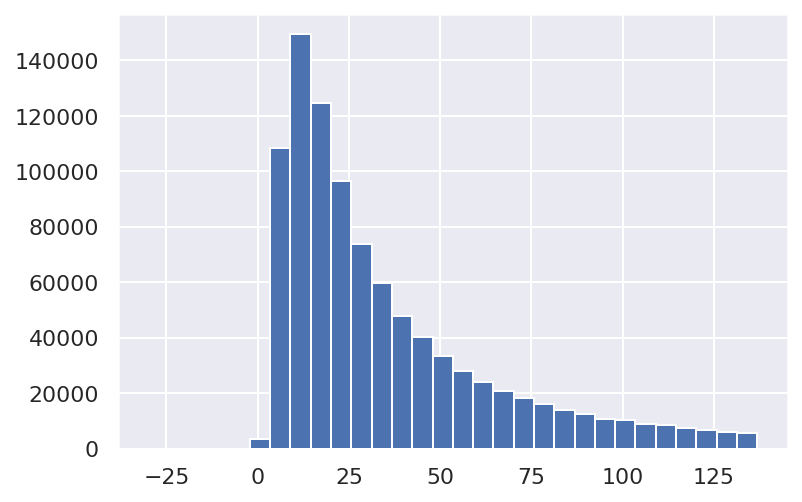

In [ ]:
# less than 
(raw_data[(raw_data['frp'] < 137)]).frp.hist(bins=30)

This target feature is satisfied with a Poisson distribution.
We need to alter our loss function to predict it more properly.
![picture](https://drive.google.com/uc?export=view&id=1DXjc2ZiwV-ueMe8BNTAI_d7O-Fo-R-VO)

(https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/poisson)

Let's examine the potential of set threshold at 180. 

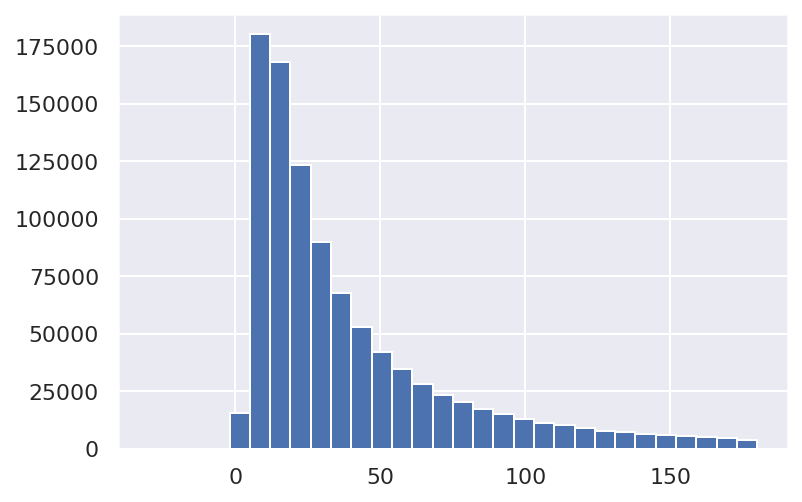

In [ ]:
# less than 
(raw_data[(raw_data['frp'] < 180)]).frp.hist(bins=30)

In [ ]:
len((raw_data[(raw_data['frp'] < 180)])) - len(raw_data[(raw_data['frp'] < 137)])

31700

In [ ]:
(len((raw_data[(raw_data['frp'] < 180)])) - len(raw_data[(raw_data['frp'] < 137)]) )/ len(raw_data)

0.030286267327423212

##### c.1.1.2. FTP data quality plan <a class="anchor" name="task1_c_1.1.2"></a>  

If we set the threshold on frp < 180. We have 0.03% outliers. I would say it's a fair rate.

Hence, I have two solution to solve this problem.
1. Delete all outliers with their instance. Since, in our data set, we can not set outliers to a same value. It will break the distribution patter. We already have a perfect Poisson distribution. We must keep it that way.
2. We set threshold at 180, and purge all instances with ftp > 180. To remain some extreme value to make this task a little bit harder.

##### c.1.1.2. Purge data set for further investigation <a class="anchor" name="task1_c_1.1.3"></a>  

There is a big difference than a normal procedure of data plan. In most cases, we don't clean data until we finish data quality plan for every feature.


But in our case, I am going to purge data set right now. Since we are removing almost 11,1000 instances. It could have a major effect on other values. 
<br>
I am not going to take the chance of analysis some characteristics on the instances that will be removed no matter what.

In the next, I am going to delete all outliers instances and redo the data quality report.
<br> Just for checking whether the data quality issues be different. 

In [ ]:
purge_data = find_outliers(raw_data, 'frp', drop=True)

IQR = 63.5 - 14.6 = 48.9
MAX = 136.85
Min is 0
Num of min outliers:  0
Num of max outliers:  111537


In [ ]:
# # get rid of Object type
# purge_data = purge_data.convert_dtypes()
# # showing the index dtype and columns, non-null values and memory usage.
# purge_data.info()

'''NO Need for converting type, our raw_data is already in a good shape '''

'NO Need for converting type, our raw_data is already in a good shape '

In [ ]:
purge_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00,935142.00
mean,-21.71,135.52,328.00,1.59,1.21,632.96,68.24,6.07,302.34,35.15,0.02
std,7.81,10.46,15.91,0.78,0.24,540.75,22.29,0.07,9.76,29.43,0.18
min,-43.50,113.13,300.00,1.00,1.00,0.00,0.00,6.03,265.70,-29.90,0.00
25%,-28.55,127.19,316.60,1.10,1.00,221.00,54.00,6.03,295.30,13.50,0.00
50%,-19.37,133.53,326.70,1.30,1.10,446.00,71.00,6.03,302.30,24.80,0.00
75%,-15.10,145.09,337.40,1.80,1.30,1225.00,86.00,6.20,308.90,47.50,0.00
max,-9.25,153.59,507.00,4.80,2.00,2359.00,100.00,6.20,400.10,136.80,3.00


In [ ]:
build_continuous_features_report(purge_data)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
latitude,935142,0.00,252622,-43.50,-28.55,-21.71,-19.37,-15.10,-9.25,7.81
longitude,935142,0.00,315707,113.13,127.19,135.52,133.53,145.09,153.59,10.46
brightness,935142,0.00,1510,300.00,316.60,328.00,326.70,337.40,507.00,15.91
scan,935142,0.00,39,1.00,1.10,1.59,1.30,1.80,4.80,0.78
track,935142,0.00,11,1.00,1.00,1.21,1.10,1.30,2.00,0.24
acq_time,935142,0.00,854,0.00,221.00,632.96,446.00,1225.00,2359.00,540.75
confidence,935142,0.00,101,0.00,54.00,68.24,71.00,86.00,100.00,22.29
version,935142,0.00,2,6.03,6.03,6.07,6.03,6.20,6.20,0.07
bright_t31,935142,0.00,854,265.70,295.30,302.34,302.30,308.90,400.10,9.76
frp,935142,0.00,1354,-29.90,13.50,35.15,24.80,47.50,136.80,29.43


In [ ]:
build_categorical_features_report(purge_data)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
acq_date,935142,0.00,1461,2020-01-04,5659,0.61,[2019-12-30],5608,0.60
satellite,935142,0.00,2,Aqua,528021,56.46,[Terra],407121,43.54
instrument,935142,0.00,1,MODIS,935142,100.00,[],0,0.00
daynight,935142,0.00,2,D,707909,75.70,[N],227233,24.30


###### Purge_data plot

Those features will be plotted in  6  rows and 2 columns
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')
1 . Finish Rendering : latitude , used 300.325 millseconds
2 . Finish Rendering : longitude , used 356.024 millseconds
3 . Finish Rendering : brightness , used 61.001 millseconds
4 . Finish Rendering : scan , used 239.489 millseconds
5 . Finish Rendering : track , used 440.486 millseconds
6 . Finish Rendering : acq_time , used 758.555 millseconds
7 . Finish Rendering : confidence , used 228.333 millseconds
8 . Finish Rendering : version , used 306.993 millseconds
9 . Finish Rendering : bright_t31 , used 176.368 millseconds
10 . Finish Rendering : frp , used 717.331 millseconds
11 . Finish Rendering : type , used 575.709 millseconds


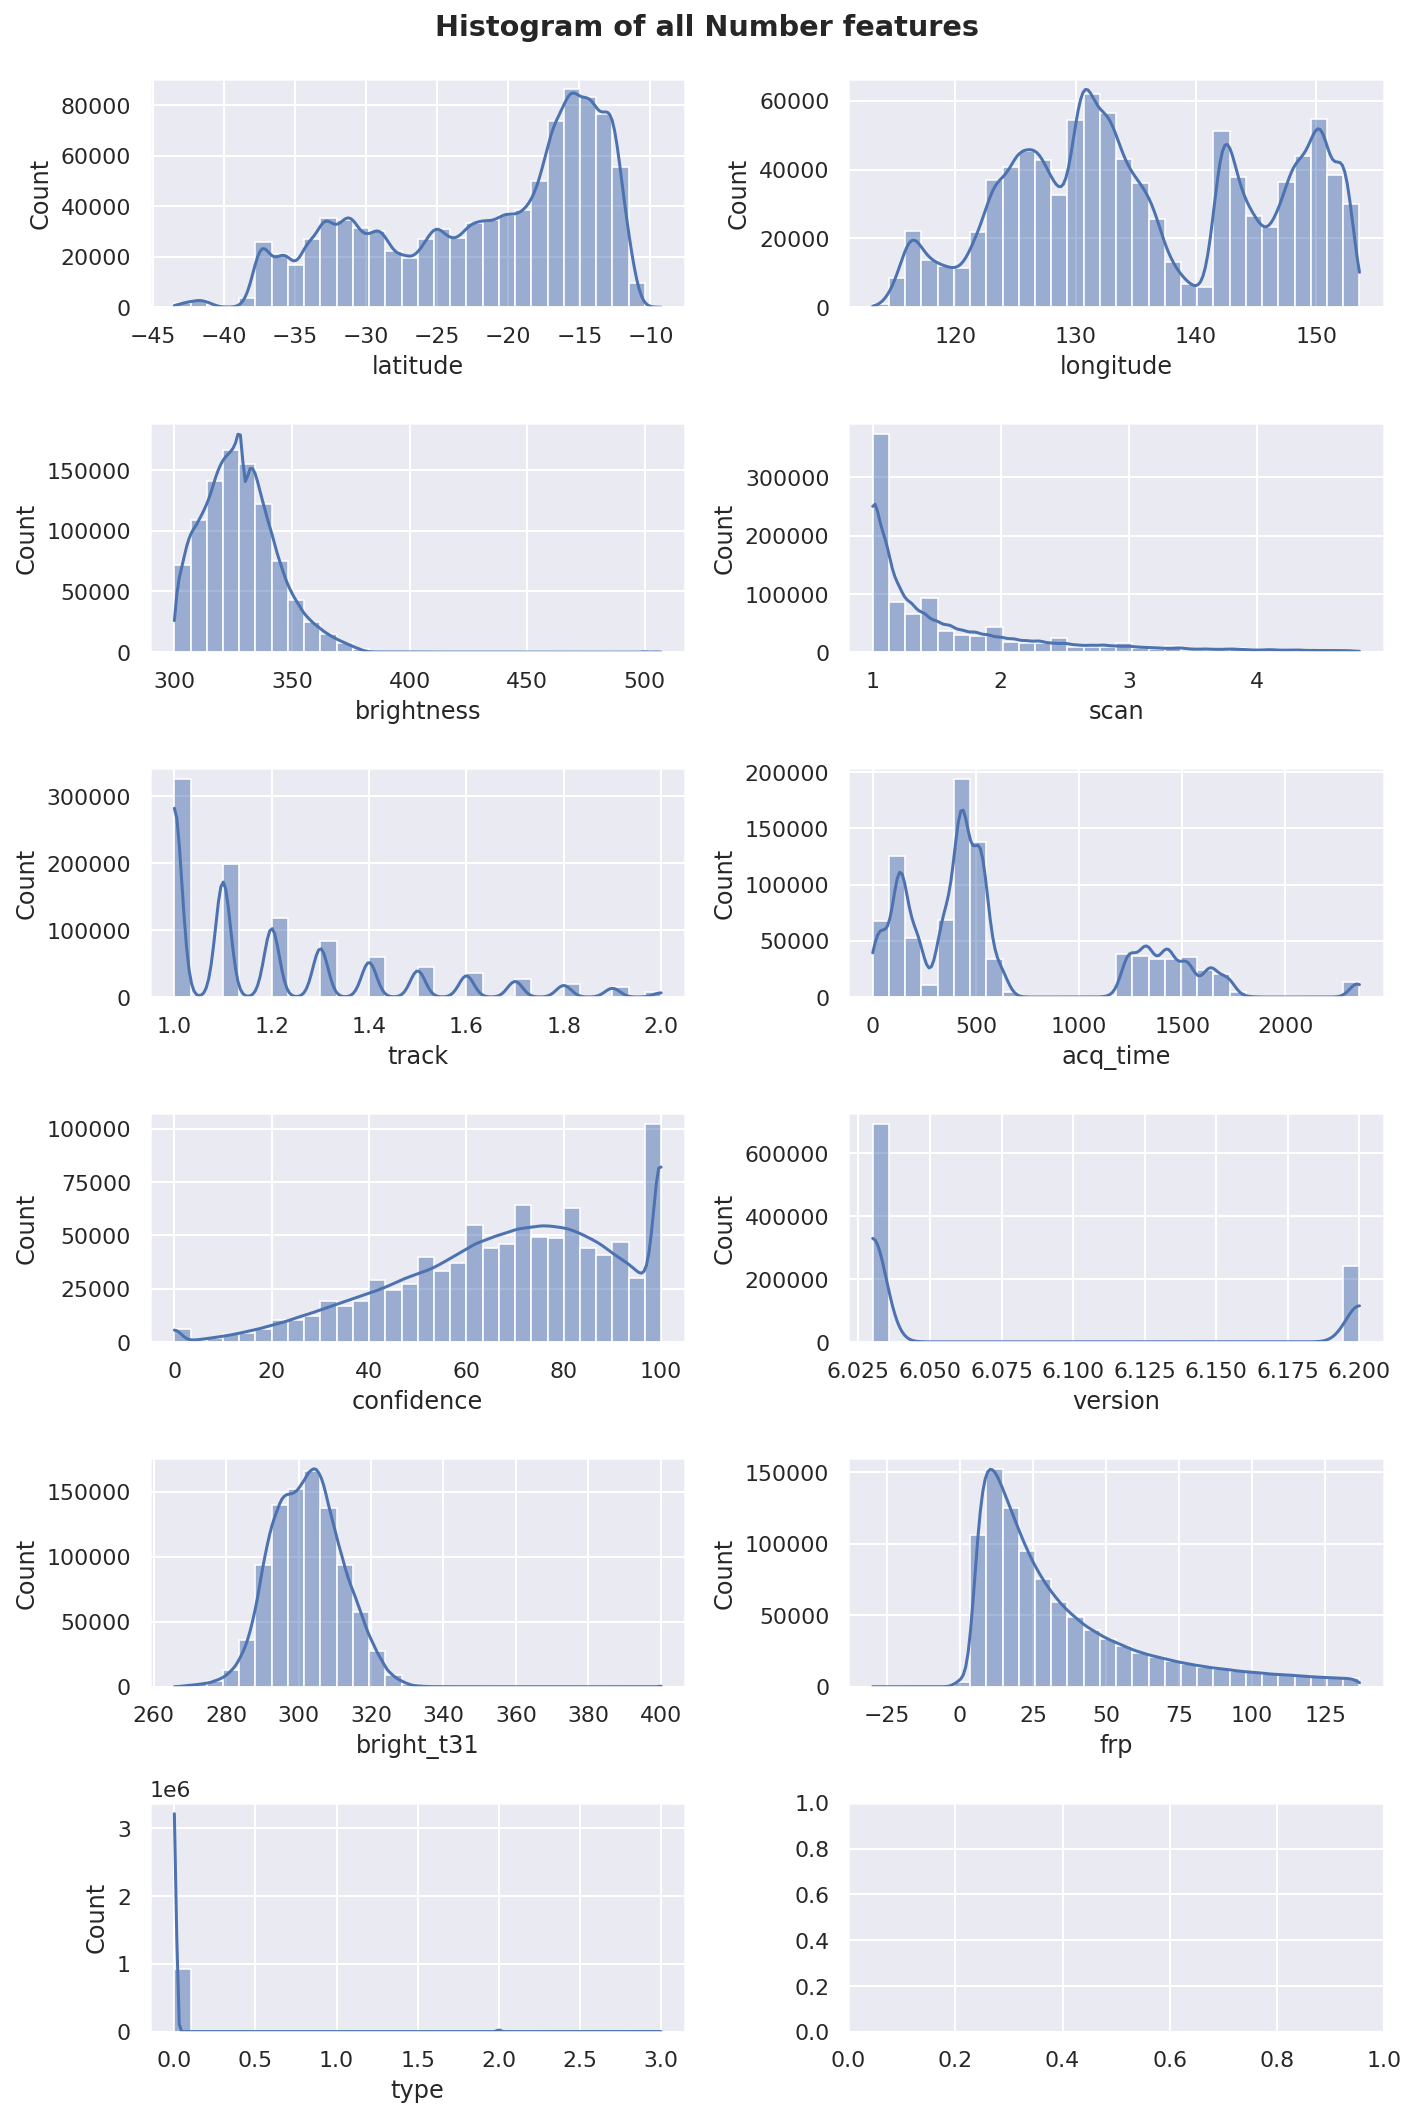

In [ ]:
ax = mulitple_function_plots(data=purge_data,plot_type="histogram",data_type="number")

Those features will be plotted in  6  rows and 2 columns
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')
1 . Finish Rendering : latitude , used 206.644 millseconds
2 . Finish Rendering : longitude , used 371.661 millseconds
3 . Finish Rendering : brightness , used 588.572 millseconds
4 . Finish Rendering : scan , used 695.793 millseconds
5 . Finish Rendering : track , used 739.235 millseconds
6 . Finish Rendering : acq_time , used 728.836 millseconds
7 . Finish Rendering : confidence , used 603.835 millseconds
8 . Finish Rendering : version , used 555.956 millseconds
9 . Finish Rendering : bright_t31 , used 736.249 millseconds
10 . Finish Rendering : frp , used 998.244 millseconds
11 . Finish Rendering : type , used 898.02 millseconds


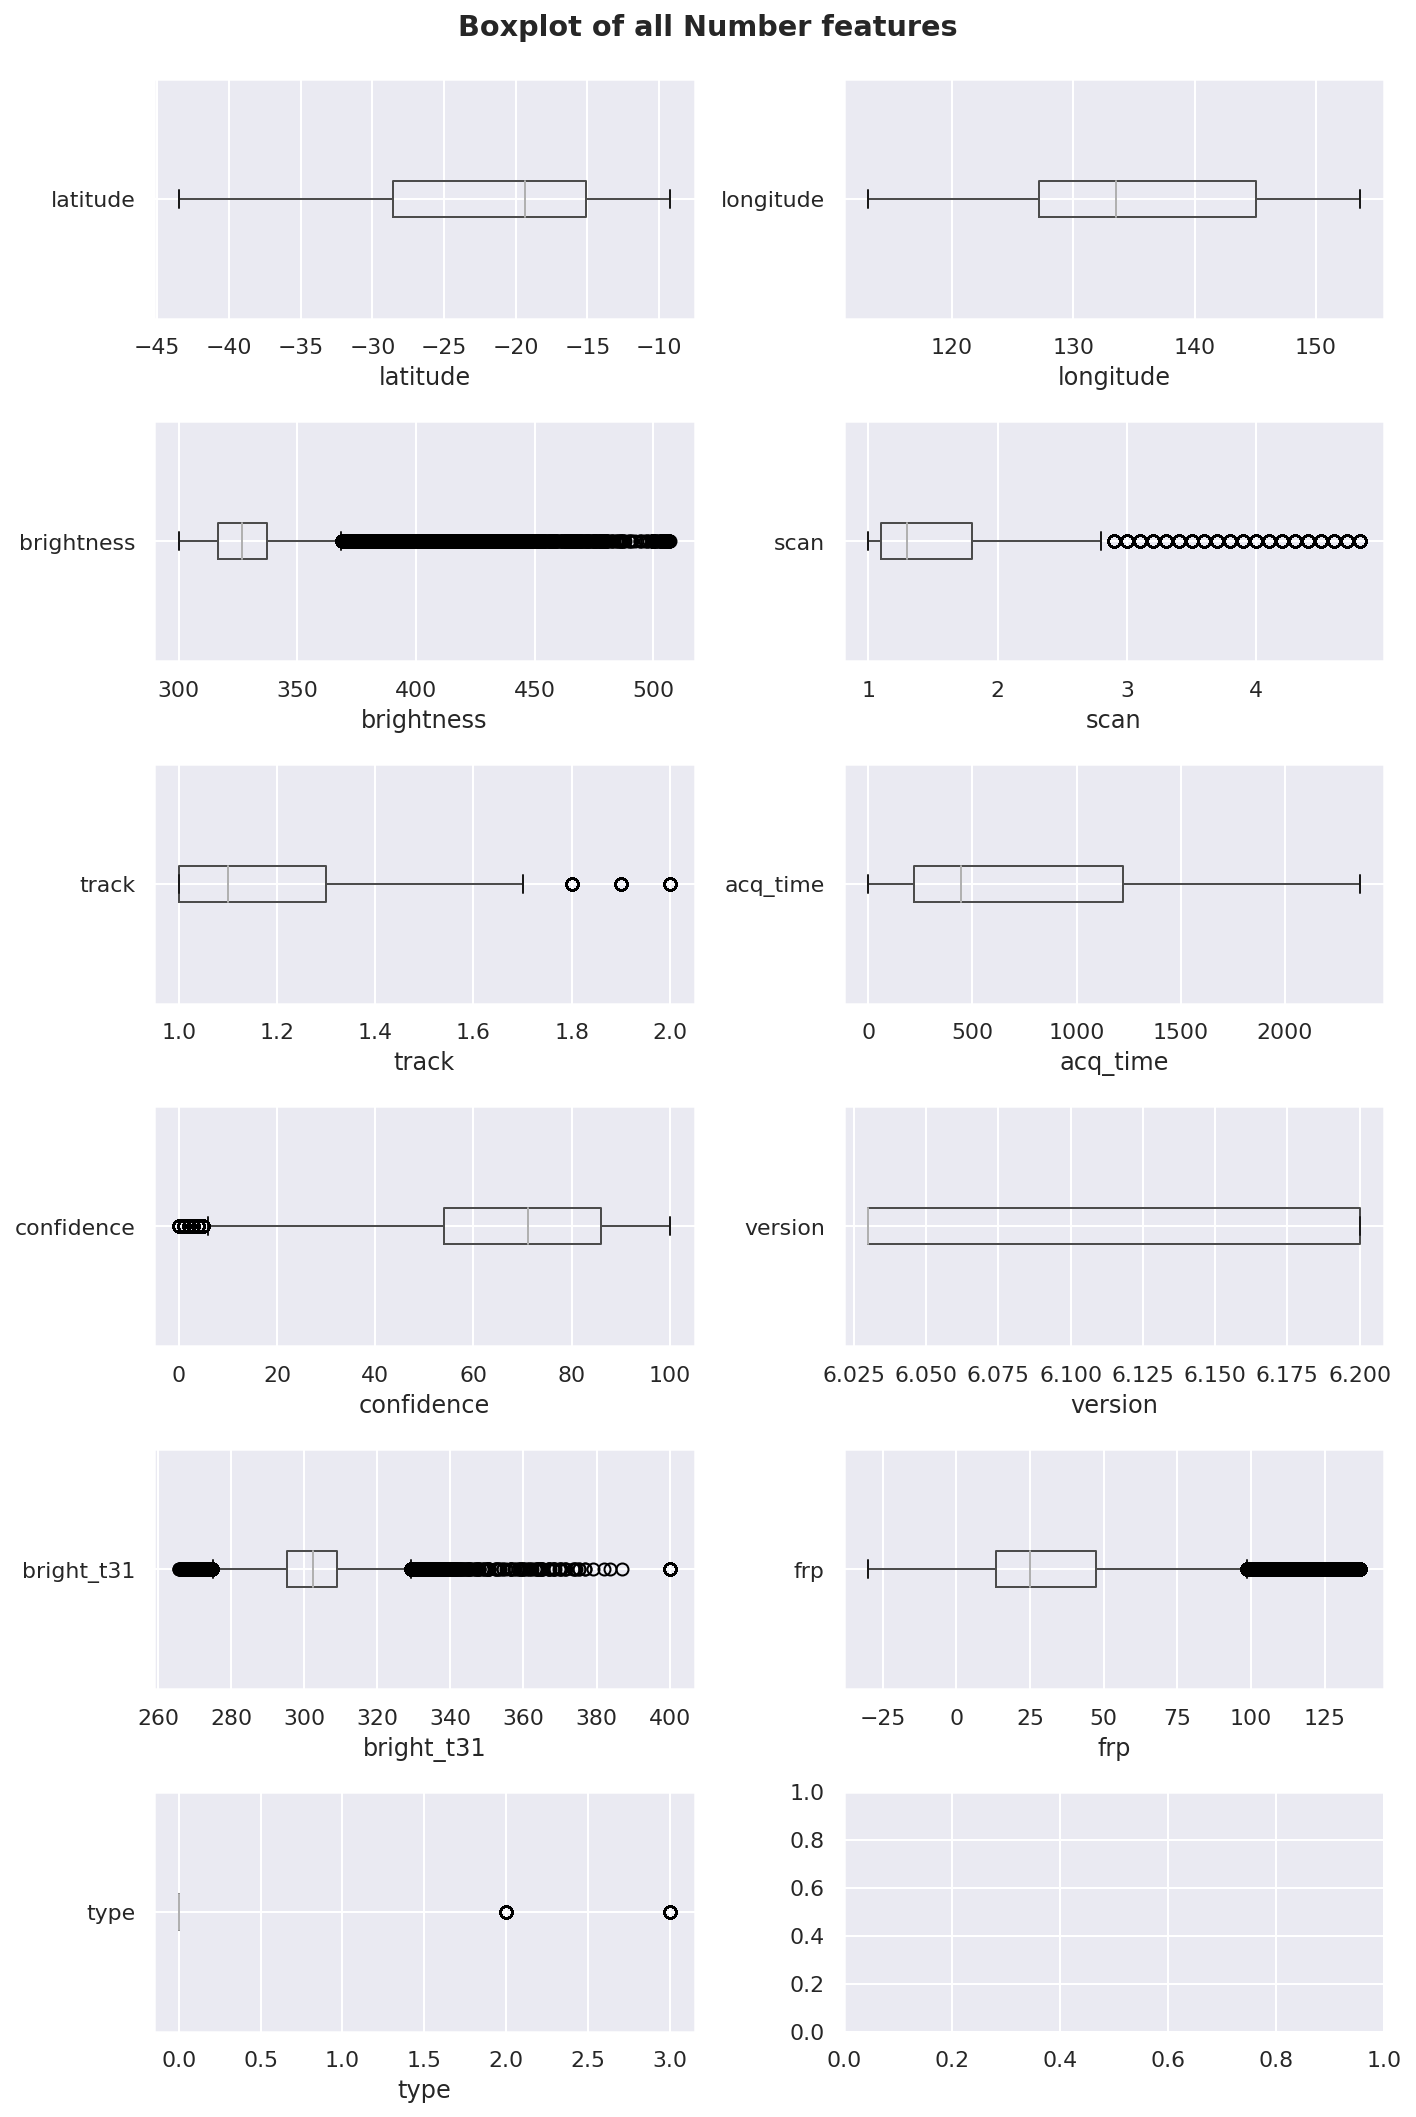

In [ ]:
ax = mulitple_function_plots(data=purge_data,plot_type="boxplot",data_type="number")

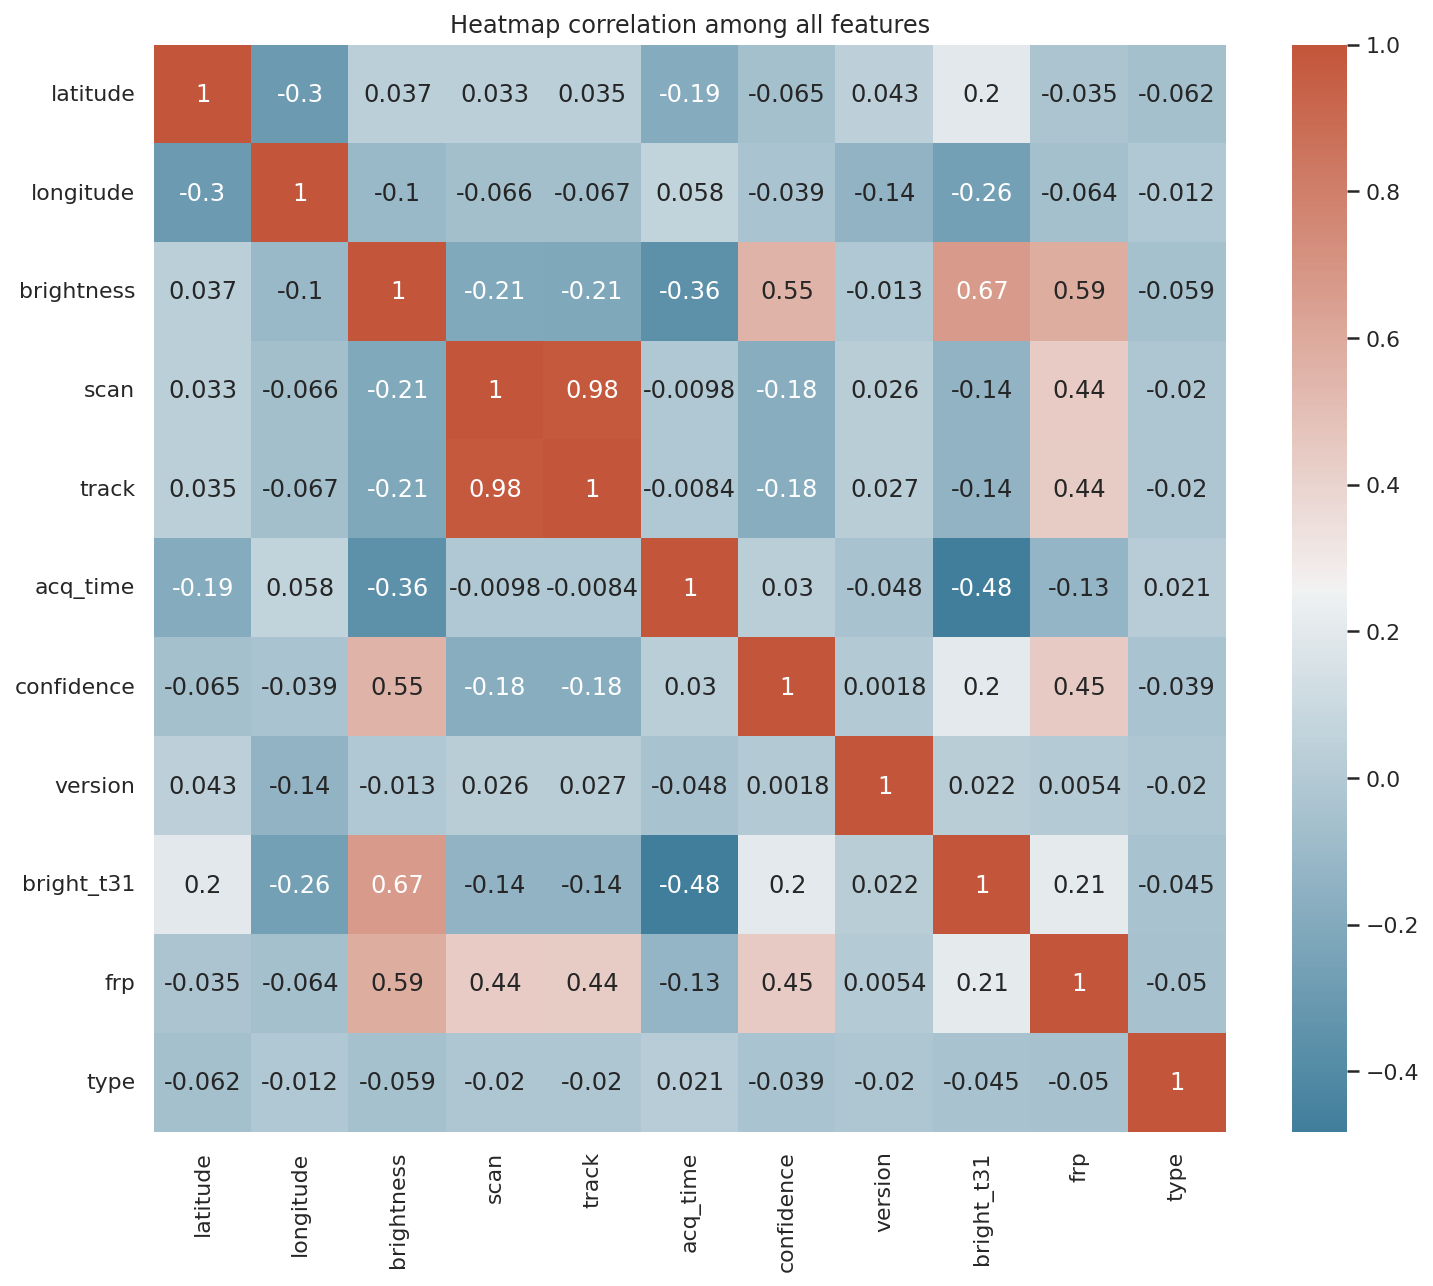

In [ ]:
heatmap_draw(purge_data)

**The previous heat_map** 

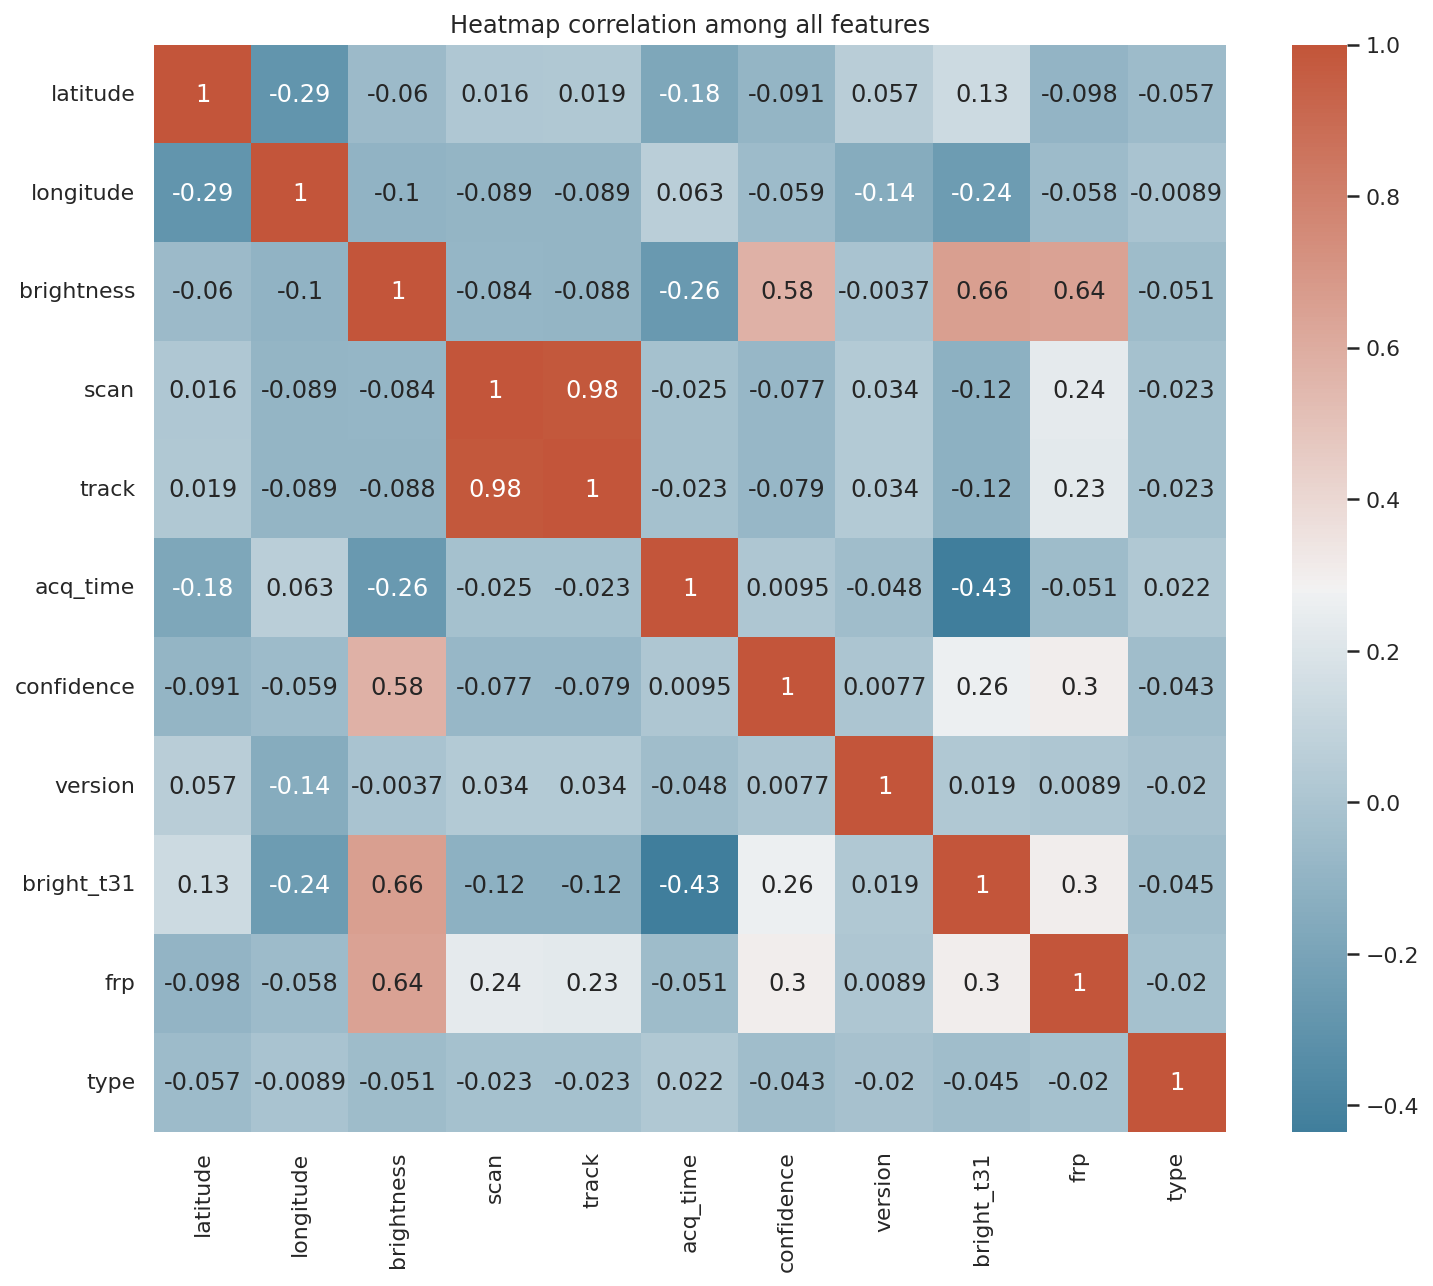

In [ ]:
heatmap_draw(raw_data)

We are seeing really good results. We have three more features have strong correlation with our target! <br>
Not bad at all!

Now we can deal with some trivial stuff.<br>
We can see that min of frp is -29. That should not happen. FRP can not be negative.
Let's see how many are they.

In [ ]:
purge_data[purge_data['frp'] <= 0].describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00,2948.00
mean,-35.42,144.58,389.42,1.26,1.08,1031.24,98.86,6.04,305.71,-0.02,0.03
std,4.31,9.24,52.23,0.47,0.16,509.51,4.03,0.03,30.52,0.71,0.29
min,-43.50,114.96,320.00,1.00,1.00,13.00,0.00,6.03,265.70,-29.90,0.00
25%,-37.46,147.85,347.95,1.00,1.00,500.00,100.00,6.03,285.50,0.00,0.00
50%,-37.16,148.32,377.80,1.10,1.00,1310.00,100.00,6.03,298.60,0.00,0.00
75%,-35.75,149.59,417.62,1.10,1.10,1449.00,100.00,6.03,315.50,0.00,0.00
max,-11.14,153.45,507.00,4.80,2.00,2359.00,100.00,6.20,400.10,0.00,3.00


We have 2948 instances with frp == 0.
Those are pretty useless. 
We should drop it.

---



Now, we take a look at our previous data quality reports again.

| Continuous Feature   | Data Quality Issue  | Potential Handling Strategies  |
 |  ----  |          ----   |              --- |
| frp  | Outliers' values are too large | Need to assign value to outliers/Drop all outliers |
| acq_time  | Not meaningful. Extension of acq_date | Concatenate with acq_time|
| scan  | Low cardinality for cont. features | Further analysis (Found interesting correlation)  |
| track  | Low cardinality for cont. features | Further analysis  (Found interesting correlation) |
| version  | Categorical value | Not a very useful feature. Drop it  |
|  brightness | Has many outliers | No action until more data analysis |
|  confidence | A lot of large values at the right end  | Handle later |
|  Type | Cardinality = 3 and not very meaningful | change to categorical data/ Drop it |

---


| Categorical Feature   | Data Quality Issue  | Potential Handling Strategies  |
|  ----  |          ----   |              --- |
|  acq_date | High Cardinality/Not a categorical data | Change to Times Series format |
|  satellite | String | One hot encoding |
|  instrument | Cardinality equal to 1/ Not useful | Drop |
|  daynight |String | One hot encoding |




Since we are seeing strong correlation between frp, with scan and track. 
I decided to keep those two values. <br>
And this following is my data quality plan.

### c.1.2 Data quality plan<a class="anchor" name="task1_c_1.2"></a>  
[back to top](#top)

**FRP:** 
   * Delete outliers for now. Threshold method will be applied if our model has low validation score. <br>
   * There are also 2948 instances with frp <= 0. It should not happen. Drop those instances

**acq_time:** 
   * I did some research and tests by myself. It's just the hour:minutes represent in a integer. Such as 12:29 pm as 1229 in acq_time values.
   * Convert it with acq_date and form them as Time Series.<br>
   
**Scan, Track**
   * Keep scan features with no further action. Track actually is a categorical feature with different type. But we are seeing strong correlation between frp and Track. Need further investigation on it. To find out whether this will sabotage our model.
   
**Version** 
   * Drop it. Cardinality with 1 should always drop it.

**Brightness**
   * Since we now know that our target feature has a Poisson distribution. No further action on *Brightness*.
   
**Confidence**
   * This one is very tricky

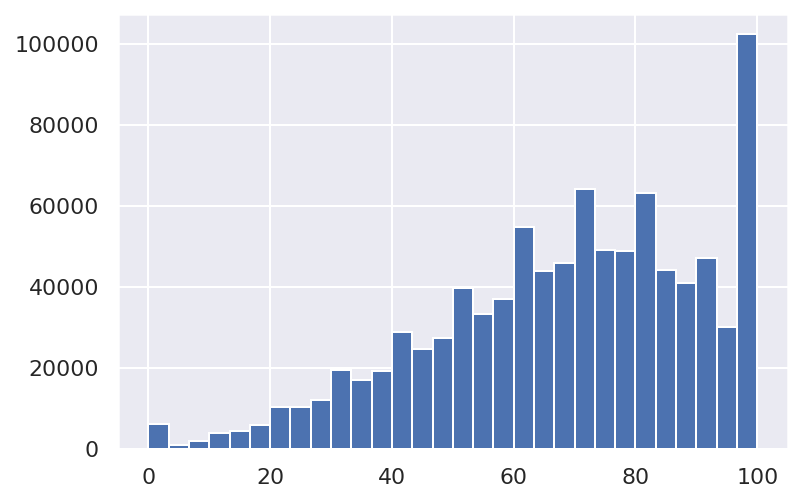

In [ ]:
purge_data.confidence.hist(bins=30)

For now, I don't know what to do with those values equal to 100. <br>
The meaning of confidence equal to 100 is the confidence range of these instances are 100%.<br>
It's a statistic concept to show the prediction lays on the truth value 100% within N experiments.
>Confidence
This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels. (Our data set official description)

---

> A 100% confidence level means there is no doubt at all that if you repeated the survey you would get the same results. In reality, you would never publish the results from a survey where you had no confidence at all that your statistics were accurate (you would probably repeat the survey with better techniques).https://www.statisticshowto.com/confidence-level/

This is hardly to be true. But we can see a strong correlation between confidence and frp.
Further investigation needs to be done. 

In [ ]:
purge_data[purge_data['confidence'] == 100].describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00,77818.00
mean,-24.53,136.04,346.69,1.28,1.10,1069.03,100.00,6.07,301.89,66.71,0.01
std,7.67,11.56,22.76,0.44,0.15,541.00,0.00,0.07,12.50,37.24,0.17
min,-43.50,113.49,320.00,1.00,1.00,0.00,100.00,6.03,265.70,0.00,0.00
25%,-31.25,125.79,327.10,1.00,1.00,507.00,100.00,6.03,293.90,32.40,0.00
50%,-23.23,133.02,341.30,1.10,1.00,1311.00,100.00,6.03,298.60,65.65,0.00
75%,-17.75,148.57,364.10,1.30,1.10,1454.00,100.00,6.03,310.20,98.10,0.00
max,-11.04,153.48,507.00,4.80,2.00,2359.00,100.00,6.20,400.10,136.80,3.00


In [ ]:
purge_data[purge_data['confidence'] != 100].describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00,857324.00
mean,-21.45,135.47,326.30,1.62,1.21,593.38,65.35,6.07,302.38,32.29,0.02
std,7.77,10.36,13.94,0.80,0.24,523.02,21.03,0.07,9.47,26.83,0.18
min,-43.50,113.13,300.00,1.00,1.00,0.00,0.00,6.03,265.70,-29.90,0.00
25%,-28.14,127.32,315.60,1.10,1.00,212.00,52.00,6.03,295.50,12.80,0.00
50%,-18.90,133.56,325.80,1.30,1.10,436.00,68.00,6.03,302.60,23.00,0.00
75%,-14.91,144.74,336.10,1.90,1.30,601.00,82.00,6.20,308.80,43.20,0.00
max,-9.25,153.59,393.10,4.80,2.00,2359.00,99.00,6.20,340.80,136.80,3.00


In [ ]:
purge_data.type.value_counts()

0    927849
2      7003
3       290
Name: type, dtype: Int64

**Type**
   * We have 927849 type as 0. only a few are different. Not very useful. Drop the column.


**acq_date** 	
   * Change to time series along with acq_time
   
**satellite**
   * String	One hot encoding
   
**instrument**	
   * Cardinality equal to 1/ Not useful. Drop it.
   
**daynight**	
> Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels.
 
 * From the description of confidence feature, we know day or night actually influence the value of confidence.
 * Further investigation needs to be done.

In [ ]:
purge_data.daynight.value_counts()

D    707909
N    227233
Name: daynight, dtype: Int64

# 2.Preprocess your data according to the data quality plan<a class="anchor" name="task1_2"></a>

In [ ]:

def feature_add(train_raw_data):
  ''' Add features'''
  train_raw_data['location'] = train_raw_data['longitude'] + train_raw_data['latitude']
  train_raw_data['location'] = train_raw_data['location'].round(0)





In [ ]:
feature_add(purge_data)

In [ ]:
purge_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,location
0,-23.91,147.30,320.10,1.70,1.30,2017-01-01,47,Terra,MODIS,53,6.20,296.60,17.60,D,0,123.00
1,-23.69,150.10,314.30,2.70,1.60,2017-01-01,47,Terra,MODIS,22,6.20,289.30,30.00,D,0,126.00
2,-23.59,150.17,315.80,2.70,1.60,2017-01-01,47,Terra,MODIS,33,6.20,291.70,35.40,D,0,127.00
3,-22.41,148.85,316.70,2.10,1.40,2017-01-01,47,Terra,MODIS,26,6.20,295.30,25.80,D,0,126.00
4,-20.59,147.64,320.70,1.60,1.30,2017-01-01,47,Terra,MODIS,34,6.20,299.60,19.00,D,0,127.00


In [ ]:
purge_data_t = purge_data.reset_index()   # adds an `index` column

In [ ]:
purge_data_t.head()

,index,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,location
0,0,-23.91,147.30,320.10,1.70,1.30,2017-01-01,47,Terra,MODIS,53,6.20,296.60,17.60,D,0,123.00
1,1,-23.69,150.10,314.30,2.70,1.60,2017-01-01,47,Terra,MODIS,22,6.20,289.30,30.00,D,0,126.00
2,2,-23.59,150.17,315.80,2.70,1.60,2017-01-01,47,Terra,MODIS,33,6.20,291.70,35.40,D,0,127.00
3,3,-22.41,148.85,316.70,2.10,1.40,2017-01-01,47,Terra,MODIS,26,6.20,295.30,25.80,D,0,126.00
4,4,-20.59,147.64,320.70,1.60,1.30,2017-01-01,47,Terra,MODIS,34,6.20,299.60,19.00,D,0,127.00


In [ ]:
purge_data_t["id"] = purge_data_t["longitude"]  + purge_data_t["latitude"]

'index', 'latitude', 'longitude', 'brightness', 'scan', 'track',
       'confidence', 'bright_t31', 'type', 'location', 'id'

In [ ]:
purge_data_t = purge_data_t.drop(['acq_date' , 'acq_time', 'satellite', 'instrument', 'version' , 'daynight'],axis = 1 )

In [ ]:
purge_train = purge_data_t.drop('frp', axis = 1)
purge_test = purge_data_t['frp']

In [ ]:
purge_train.head()

,index,latitude,longitude,brightness,scan,track,confidence,bright_t31,type,location,id
0,0,-23.91,147.30,320.10,1.70,1.30,53,296.60,0,123.00,123.39
1,1,-23.69,150.10,314.30,2.70,1.60,22,289.30,0,126.00,126.41
2,2,-23.59,150.17,315.80,2.70,1.60,33,291.70,0,127.00,126.58
3,3,-22.41,148.85,316.70,2.10,1.40,26,295.30,0,126.00,126.44
4,4,-20.59,147.64,320.70,1.60,1.30,34,299.60,0,127.00,127.05


In [ ]:
purge_test.head()

0   17.60
1   30.00
2   35.40
3   25.80
4   19.00
Name: frp, dtype: Float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy="median")),
        # ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

purge_train = num_pipeline.fit_transform(purge_train)

In [ ]:
!wget https://dalu-my.sharepoint.com/:u:/g/personal/zs549061_dal_ca/EdoHoCPo4L9Fv7MZ2IuE3gkBC9aFy6yyNWbCfHdfvizxBA?download=1

--2022-05-25 20:01:02--  https://dalu-my.sharepoint.com/:u:/g/personal/zs549061_dal_ca/EdoHoCPo4L9Fv7MZ2IuE3gkBC9aFy6yyNWbCfHdfvizxBA?download=1
Resolving dalu-my.sharepoint.com (dalu-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to dalu-my.sharepoint.com (dalu-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zs549061_dal_ca/Documents/final_model.pkl?ga=1 [following]
--2022-05-25 20:01:04--  https://dalu-my.sharepoint.com/personal/zs549061_dal_ca/Documents/final_model.pkl?ga=1
Reusing existing connection to dalu-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 460635380 (439M) [application/octet-stream]
Saving to: ‘EdoHoCPo4L9Fv7MZ2IuE3gkBC9aFy6yyNWbCfHdfvizxBA?download=1’

EdoHoCPo4L9Fv7MZ2Iu 100%[===================>] 439.30M  39.6MB/s    in 15s     

2022-05-25 20:01:20 (28.8 MB/s) - ‘EdoHoCPo4L9Fv7MZ2IuE3gkBC9aFy6yyNWbCfHdfvizxBA?download=1’ saved [460635380/460635380]

In [ ]:
import joblib
final_model = joblib.load('/content/drive/MyDrive/4146/final_model.pkl')

In [ ]:
final_predictions = final_model.predict(purge_train)

In [ ]:
y_test = purge_test.to_numpy(dtype=float);y_test

array([17.6, 30. , 35.4, ..., 20.6, 69. ,  7. ])

In [ ]:
# final_model = grid_search.best_estimator_
from sklearn.metrics import mean_squared_error
# X_test = strat_test_set.drop("target", axis=1)
# y_test = strat_test_set["target"].copy()

# X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(purge_train)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

7.430151688398675

In [ ]:
final_model.score(purge_train, y_test)

0.9362446460055988

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
final_model.verbose = 20

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(final_model, purge_train, y_test,
                                scoring="neg_mean_squared_error", cv=3,verbose=1)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


building tree 3 of 30


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s remaining:    0.0s


building tree 4 of 30


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.7s remaining:    0.0s


building tree 5 of 30


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.2s remaining:    0.0s


building tree 6 of 30


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.6s remaining:    0.0s


building tree 7 of 30


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.0s remaining:    0.0s


building tree 8 of 30


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.5s remaining:    0.0s


building tree 9 of 30


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.9s remaining:    0.0s


building tree 10 of 30


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.5s remaining:    0.0s


building tree 11 of 30


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   37.8s remaining:    0.0s


building tree 12 of 30


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   41.2s remaining:    0.0s


building tree 13 of 30


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   44.7s remaining:    0.0s


building tree 14 of 30


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   48.0s remaining:    0.0s


building tree 15 of 30


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   51.4s remaining:    0.0s


building tree 16 of 30


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   54.7s remaining:    0.0s


building tree 17 of 30


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   58.3s remaining:    0.0s


building tree 18 of 30


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min remaining:    0.0s


building tree 19 of 30


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.1min remaining:    0.0s


building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  1

building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 30


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s remaining:    0.0s


building tree 4 of 30


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.5s remaining:    0.0s


building tree 5 of 30


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.0s remaining:    0.0s


building tree 6 of 30


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.3s remaining:    0.0s


building tree 7 of 30


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.2s remaining:    0.0s


building tree 8 of 30


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.7s remaining:    0.0s


building tree 9 of 30


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   31.1s remaining:    0.0s


building tree 10 of 30


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.6s remaining:    0.0s


building tree 11 of 30


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   37.9s remaining:    0.0s


building tree 12 of 30


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   41.3s remaining:    0.0s


building tree 13 of 30


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   44.8s remaining:    0.0s


building tree 14 of 30


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   48.1s remaining:    0.0s


building tree 15 of 30


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   51.4s remaining:    0.0s


building tree 16 of 30


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   54.7s remaining:    0.0s


building tree 17 of 30


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   58.2s remaining:    0.0s


building tree 18 of 30


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min remaining:    0.0s


building tree 19 of 30


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.1min remaining:    0.0s


building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  1

building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 30


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 30


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s remaining:    0.0s


building tree 4 of 30


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.4s remaining:    0.0s


building tree 5 of 30


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.9s remaining:    0.0s


building tree 6 of 30


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.2s remaining:    0.0s


building tree 7 of 30


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.6s remaining:    0.0s


building tree 8 of 30


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.0s remaining:    0.0s


building tree 9 of 30


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.4s remaining:    0.0s


building tree 10 of 30


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.9s remaining:    0.0s


building tree 11 of 30


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   37.2s remaining:    0.0s


building tree 12 of 30


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   40.6s remaining:    0.0s


building tree 13 of 30


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   44.0s remaining:    0.0s


building tree 14 of 30


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   47.3s remaining:    0.0s


building tree 15 of 30


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   50.5s remaining:    0.0s


building tree 16 of 30


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   53.8s remaining:    0.0s


building tree 17 of 30


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   57.3s remaining:    0.0s


building tree 18 of 30


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min remaining:    0.0s


building tree 19 of 30


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.1min remaining:    0.0s


building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  1

Scores: [6.26294287 5.65811798 7.6274009 ]
Mean: 6.516153916405883
Standard deviation: 0.823652708010453


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.4min finished


In [ ]:
display_scores(forest_rmse_scores)

Scores: [6.26294287 5.65811798 7.6274009 ]
Mean: 6.516153916405883
Standard deviation: 0.823652708010453


# Question: 

1. How to deal with confidence's histogram. Huge amounts of items with confi = 100
2. how to deal with birghtness/birghtness_t31 wildly spread outliers
3. Deal with time and location
4. What is strafied sampling. What's the key to seperate by this method.
5. When should we use one hot encoding. When should we use index for categorical data. 